In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


In [2]:
product_data = pd.read_csv("user_personalized_features.csv")

In [3]:
product_data.head()

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


In [4]:
product_data.dtypes

Unnamed: 0                      int64
User_ID                        object
Age                             int64
Gender                         object
Location                       object
Income                          int64
Interests                      object
Last_Login_Days_Ago             int64
Purchase_Frequency              int64
Average_Order_Value             int64
Total_Spending                  int64
Product_Category_Preference    object
Time_Spent_on_Site_Minutes      int64
Pages_Viewed                    int64
Newsletter_Subscription          bool
dtype: object

In [5]:
product_data.describe()

,Unnamed: 0,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,40.986000,81304.732000,15.586000,4.631000,104.039000,2552.957000,297.360000,24.40300
std,288.819436,13.497852,37363.972753,8.205604,2.837762,54.873569,1420.985048,175.596123,14.02017
min,0.000000,18.000000,20155.000000,1.000000,0.000000,10.000000,112.000000,2.000000,1.00000
25%,249.750000,29.000000,48715.500000,8.000000,2.000000,58.000000,1271.750000,144.000000,12.00000
50%,499.500000,42.000000,81042.000000,16.000000,5.000000,105.000000,2542.000000,292.500000,24.50000
75%,749.250000,52.000000,112694.500000,23.000000,7.000000,150.000000,3835.500000,449.250000,36.00000
max,999.000000,64.000000,149951.000000,29.000000,9.000000,199.000000,4999.000000,599.000000,49.00000


In [6]:
product_data.isnull().sum()

Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64

In [7]:
#No missing value present :)

In [8]:
product_data.duplicated().sum()

0

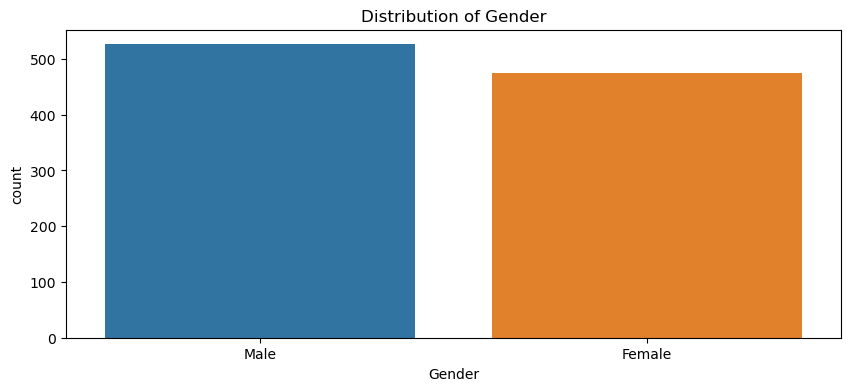

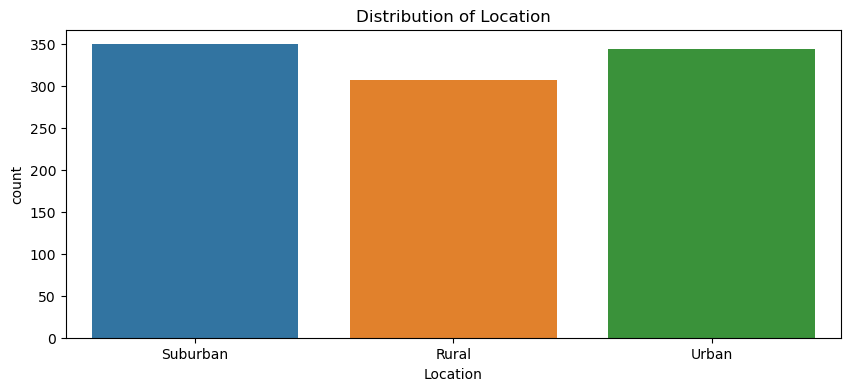

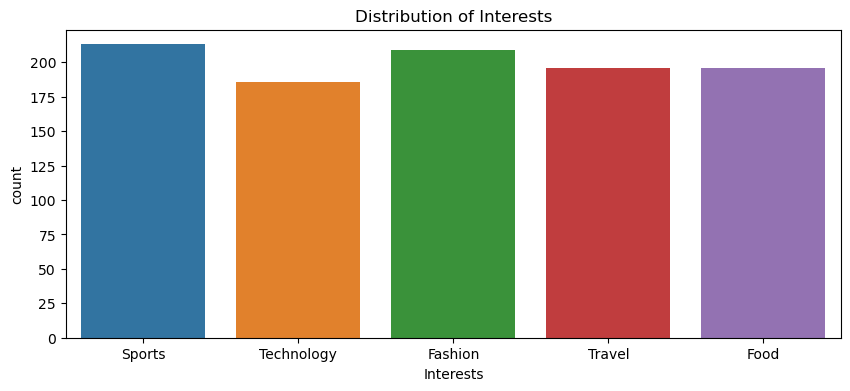

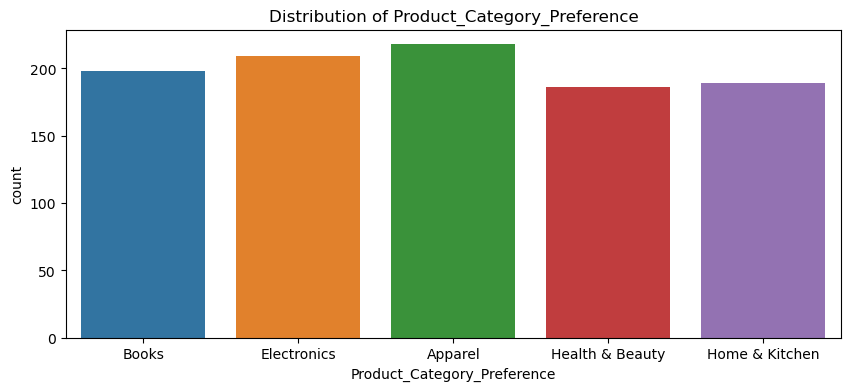

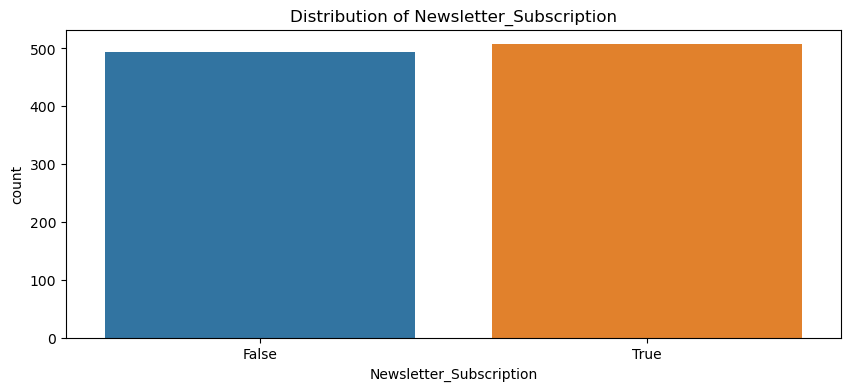

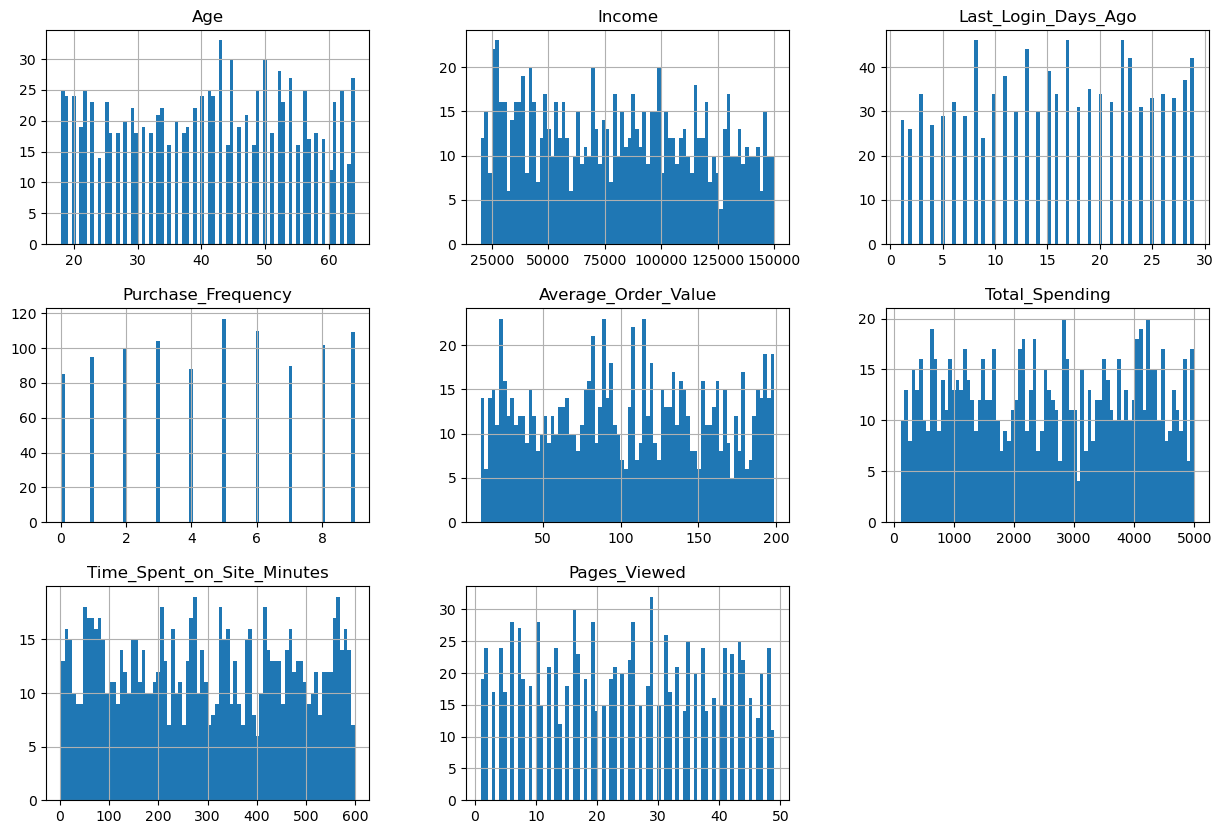

In [9]:
# Categorical variable distribution
categorical_columns = ['Gender', 'Location', 'Interests', 'Product_Category_Preference', 'Newsletter_Subscription']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=product_data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Numerical variable distribution
numerical_columns = ['Age', 'Income','Newsletter_Subscription','Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']
product_data[numerical_columns].hist(bins=80, figsize=(15, 10))
plt.show()

In [10]:
#The distribution of all variables is normal i.e no category as much difference than others.

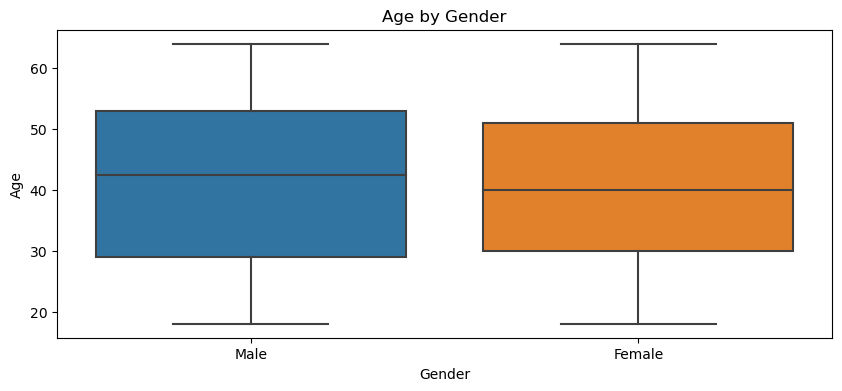

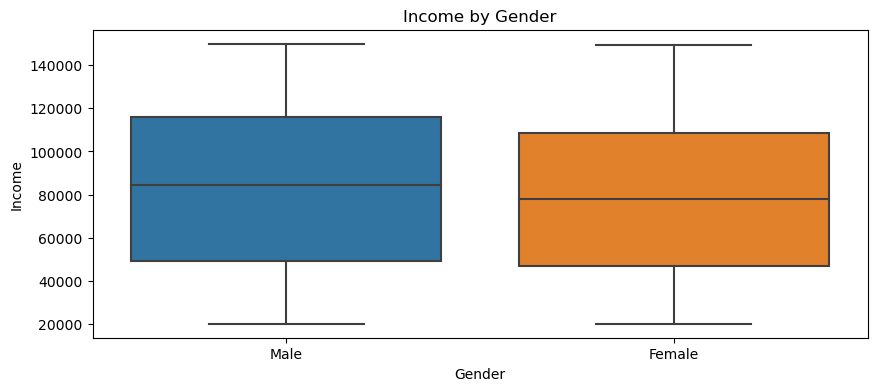

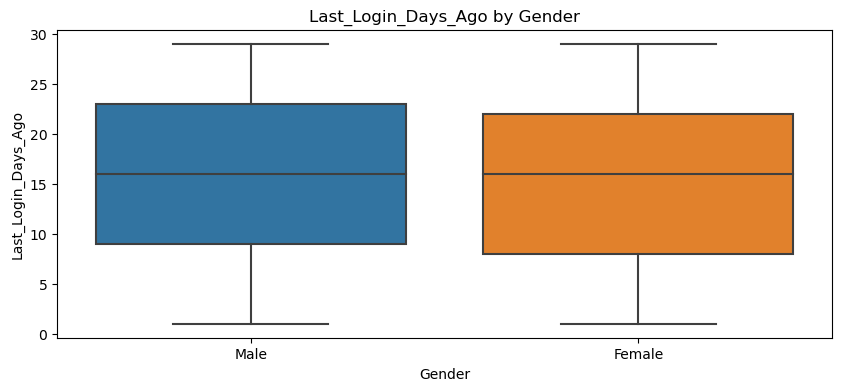

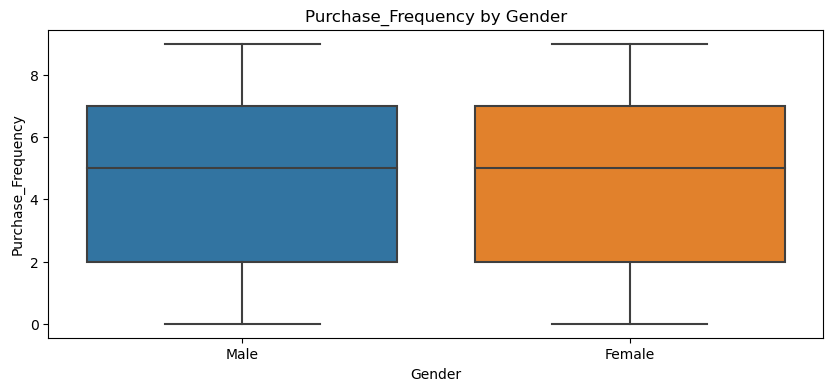

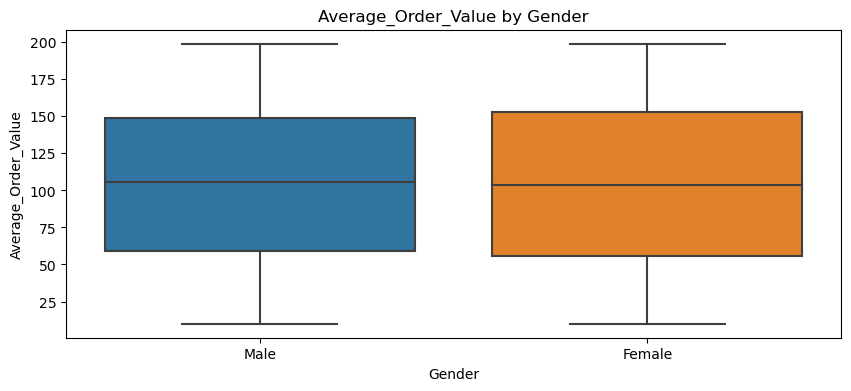

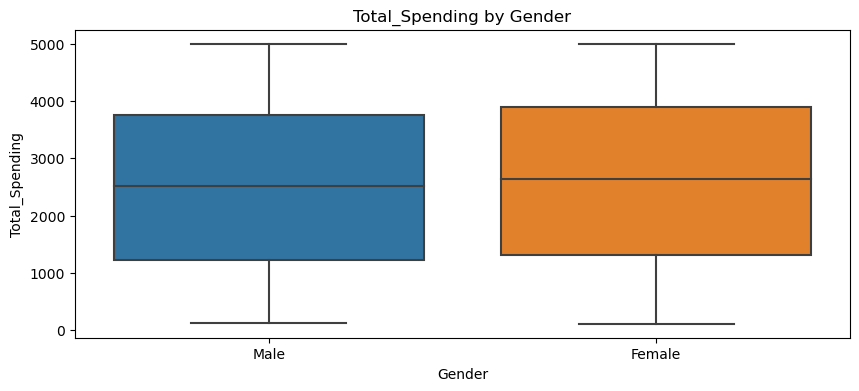

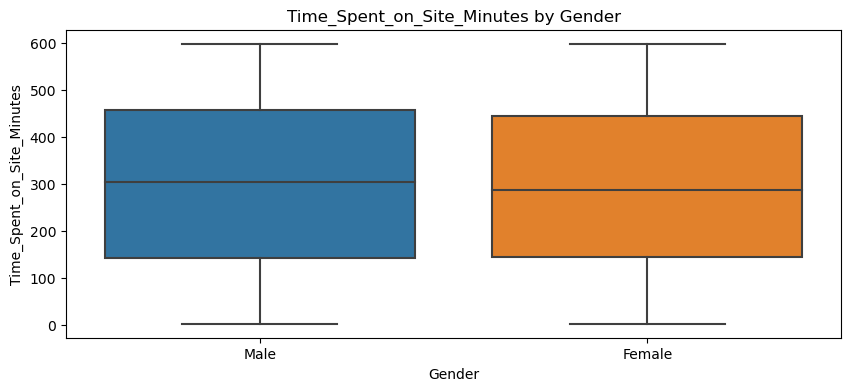

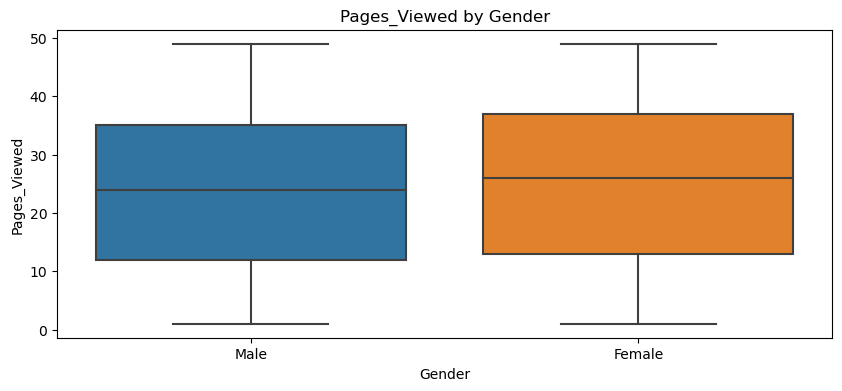

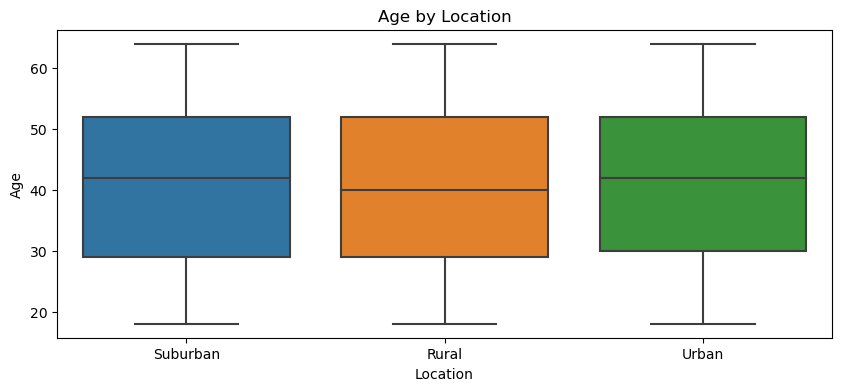

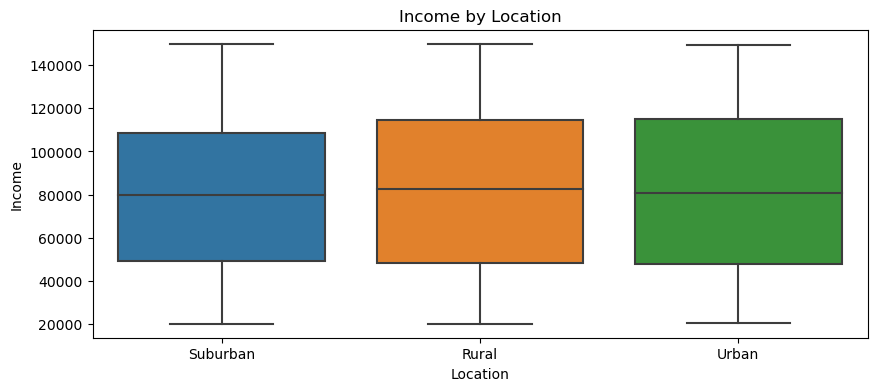

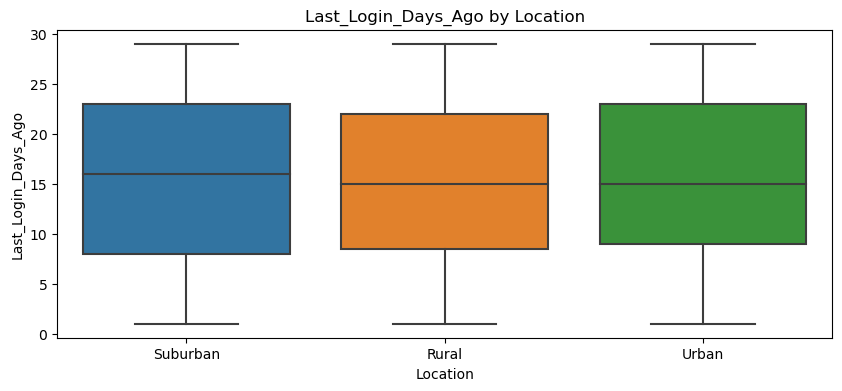

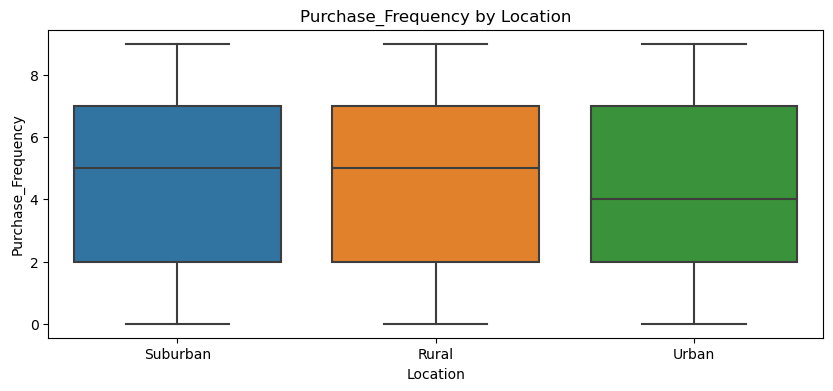

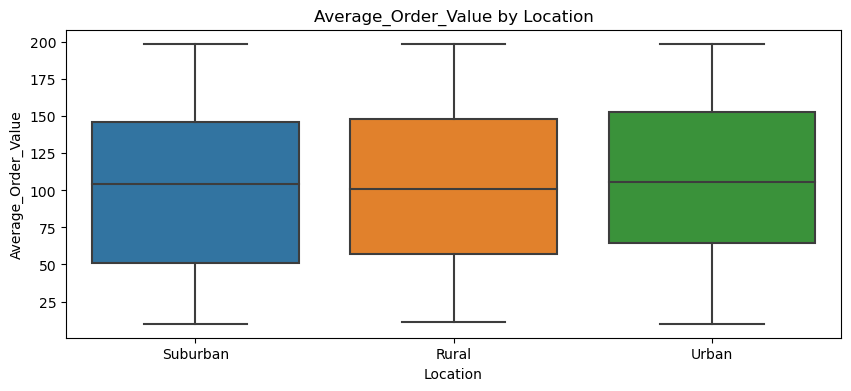

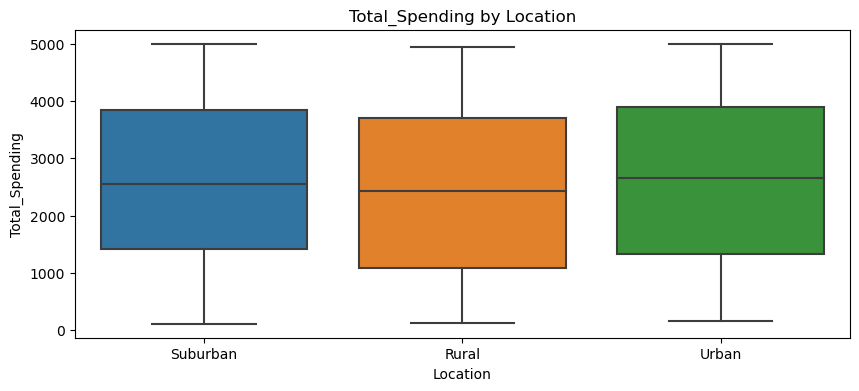

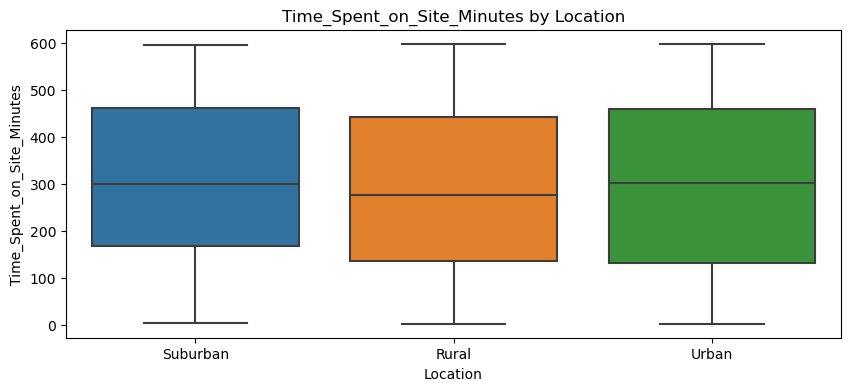

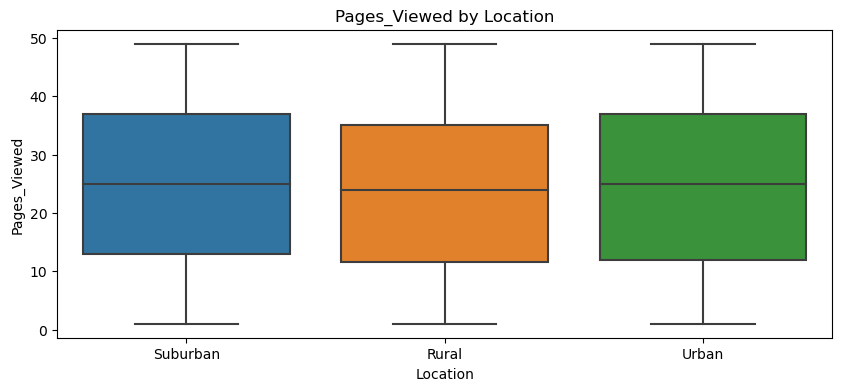

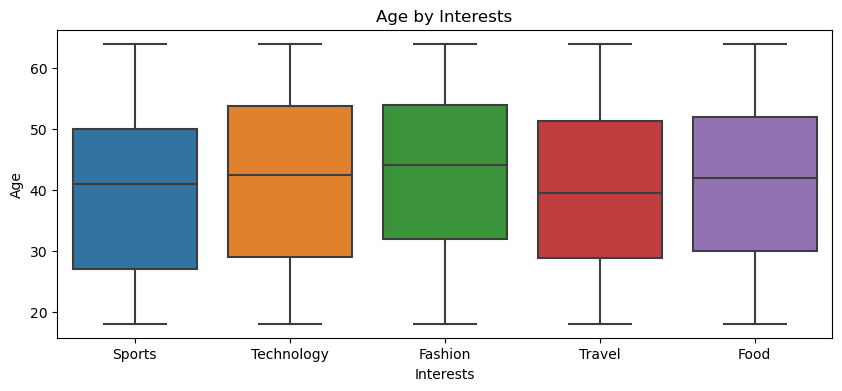

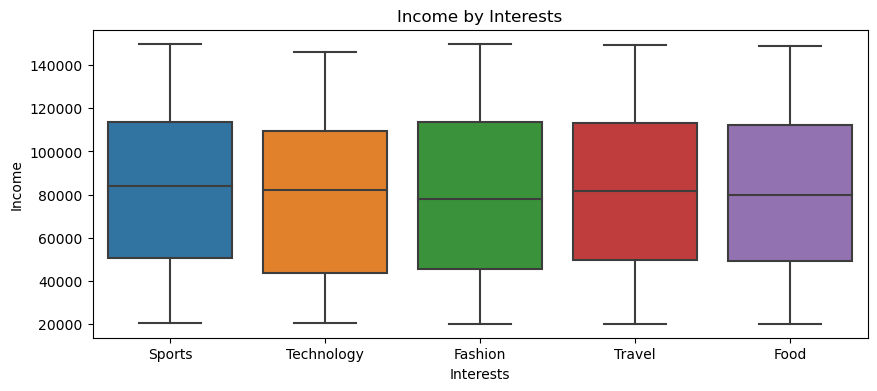

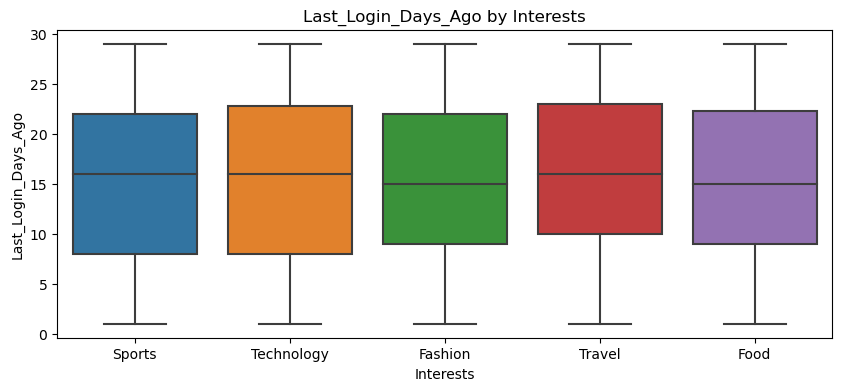

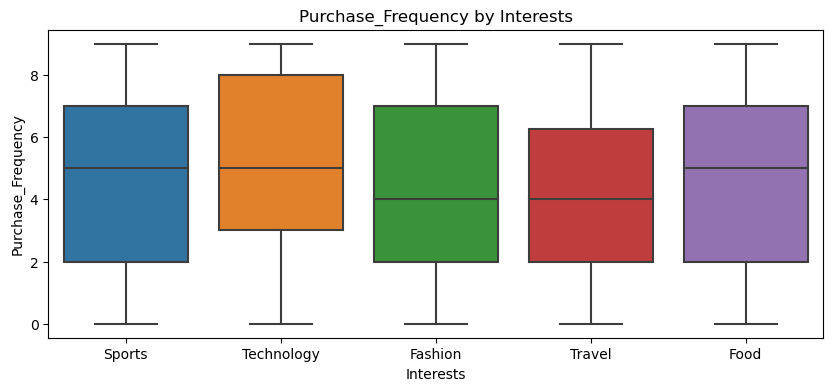

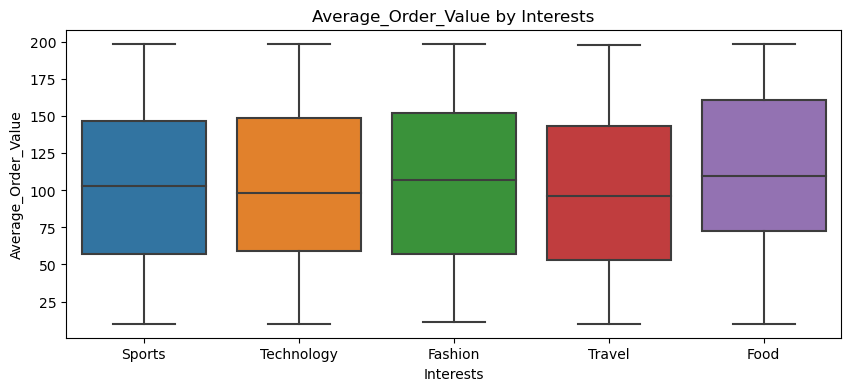

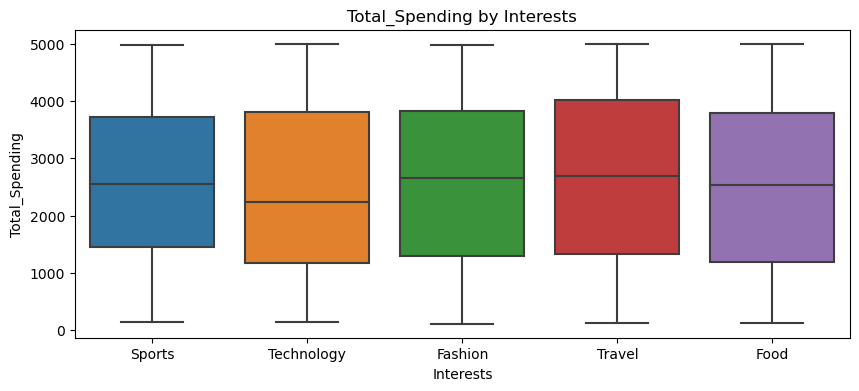

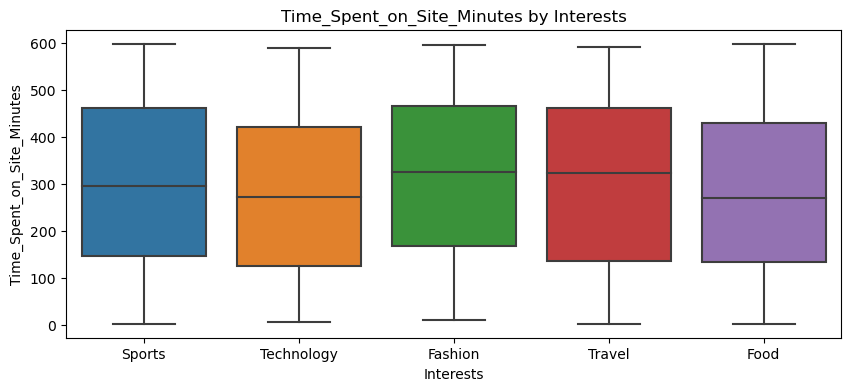

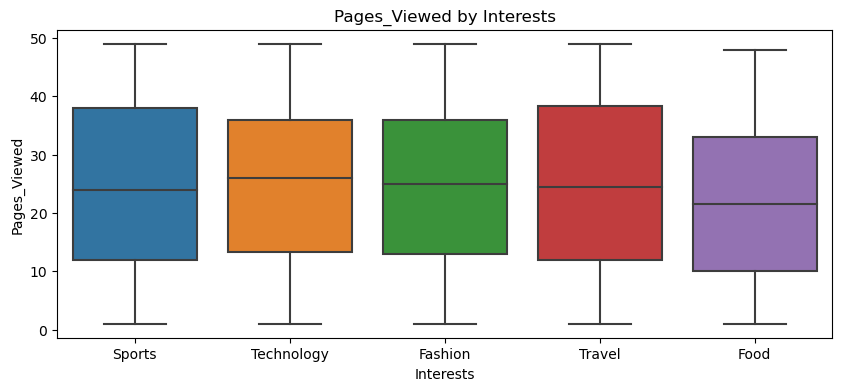

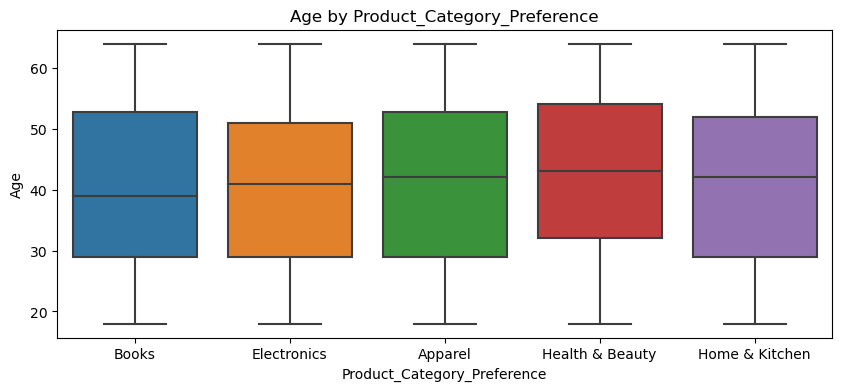

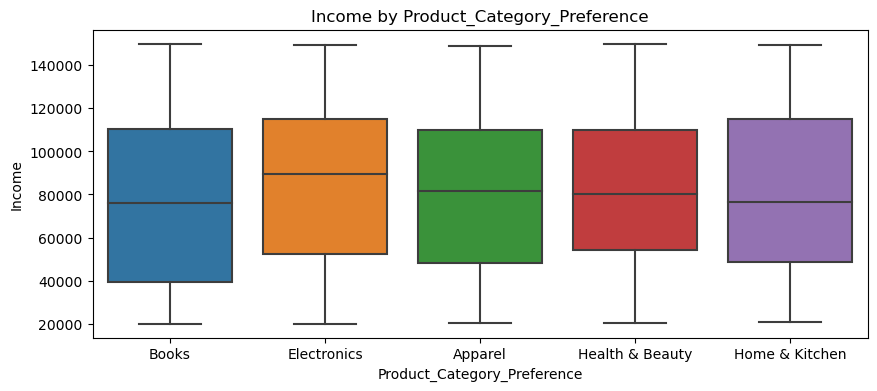

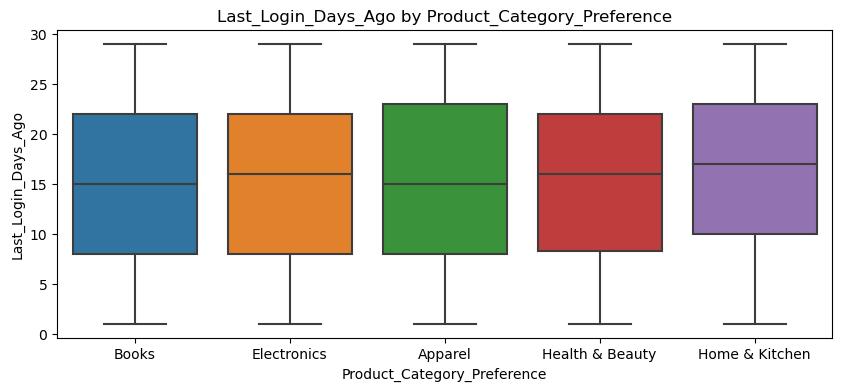

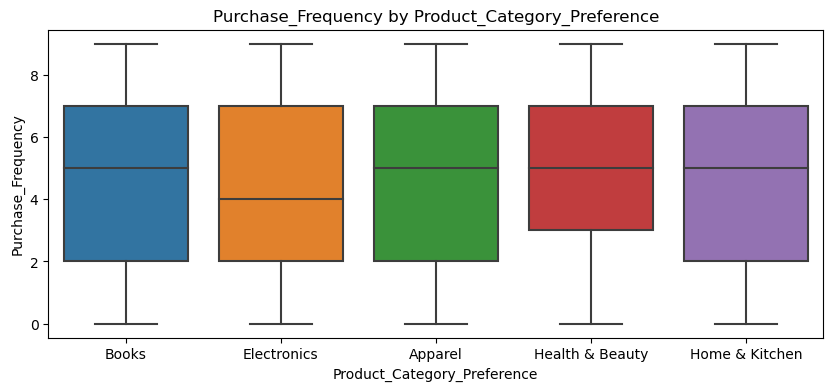

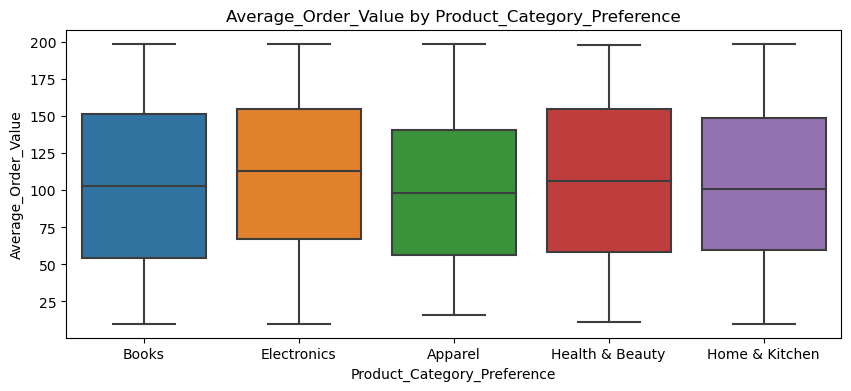

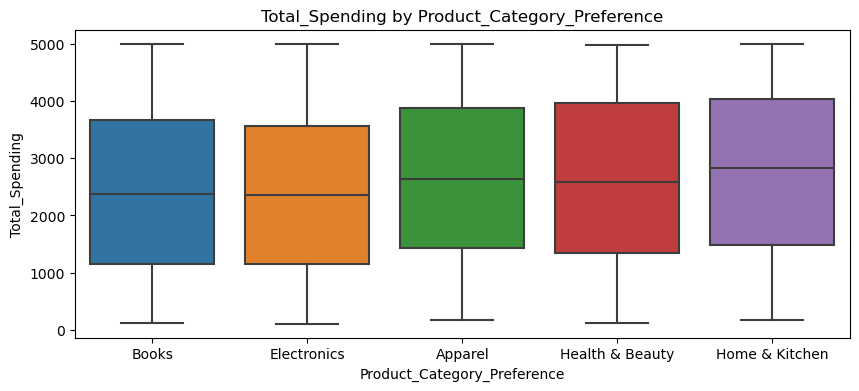

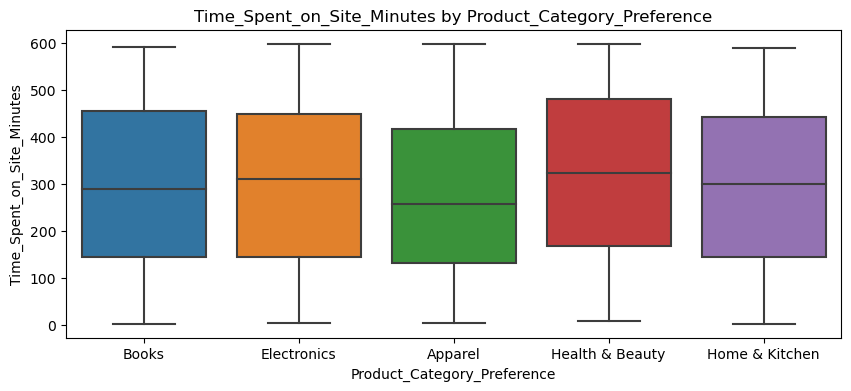

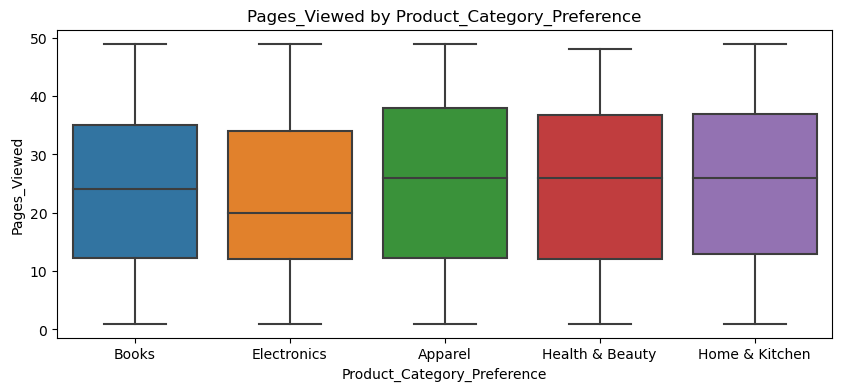

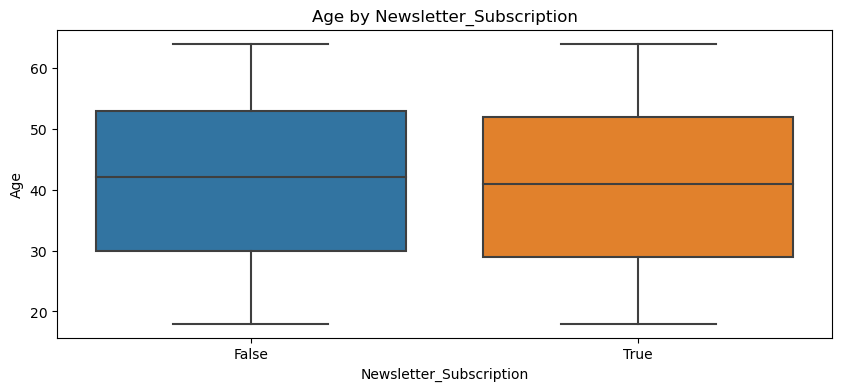

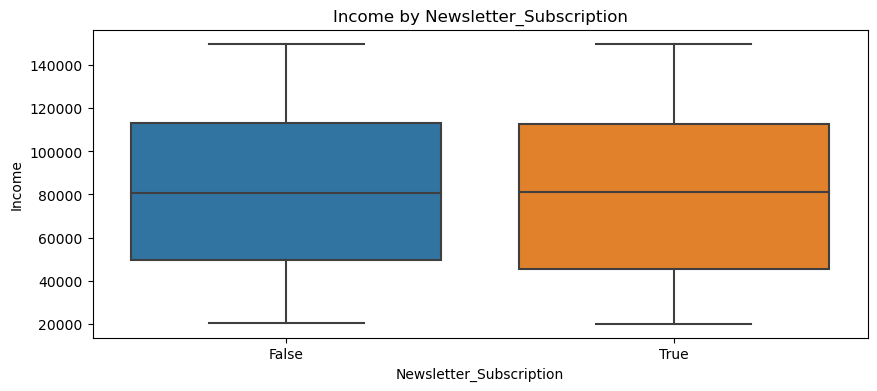

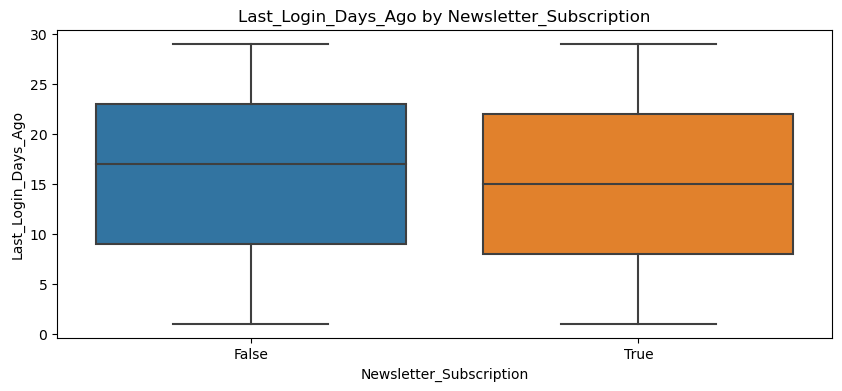

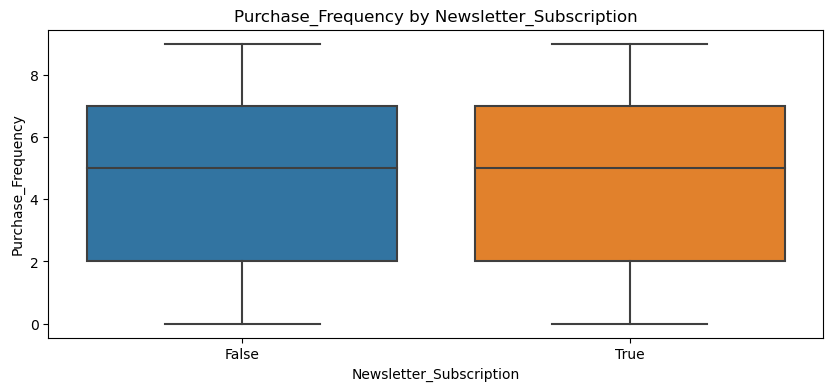

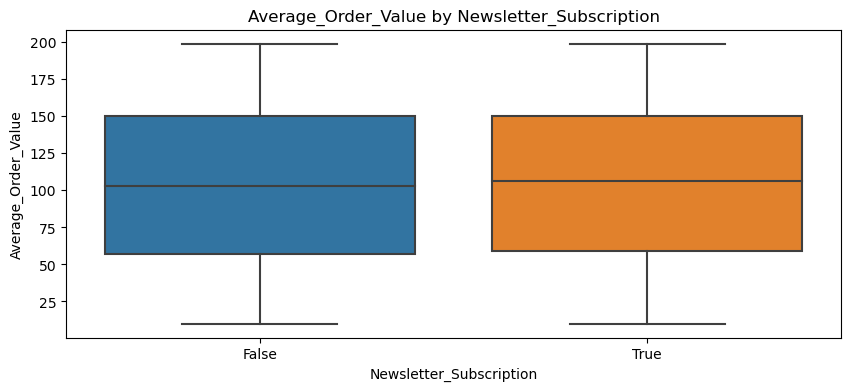

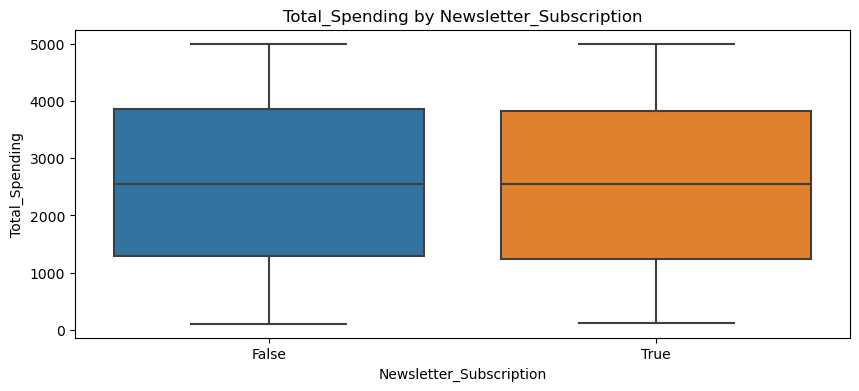

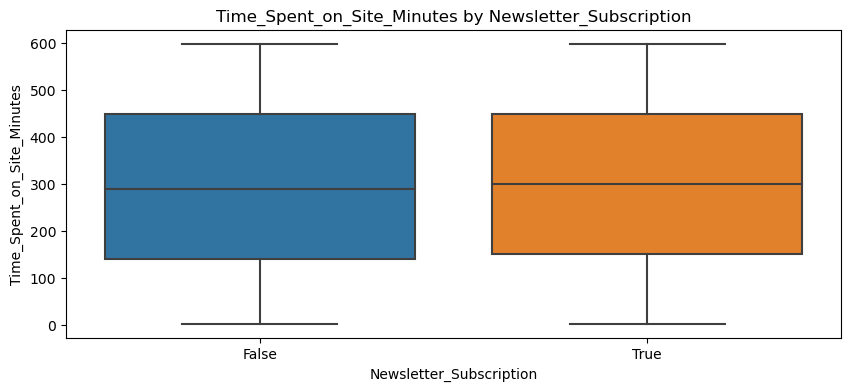

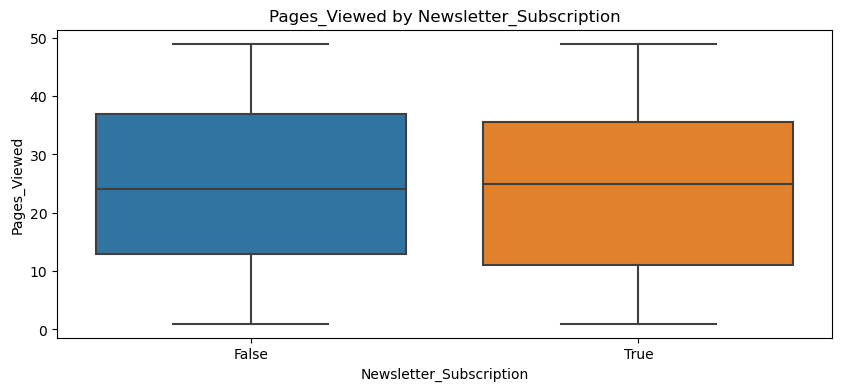

In [11]:
# Categorical-Numerical relationships
numerical_columns_n = ['Age', 'Income','Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']
for cat_col in categorical_columns:
    for num_col in numerical_columns_n:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=product_data[cat_col], y=product_data[num_col])
        plt.title(f'{num_col} by {cat_col}')
        plt.show()

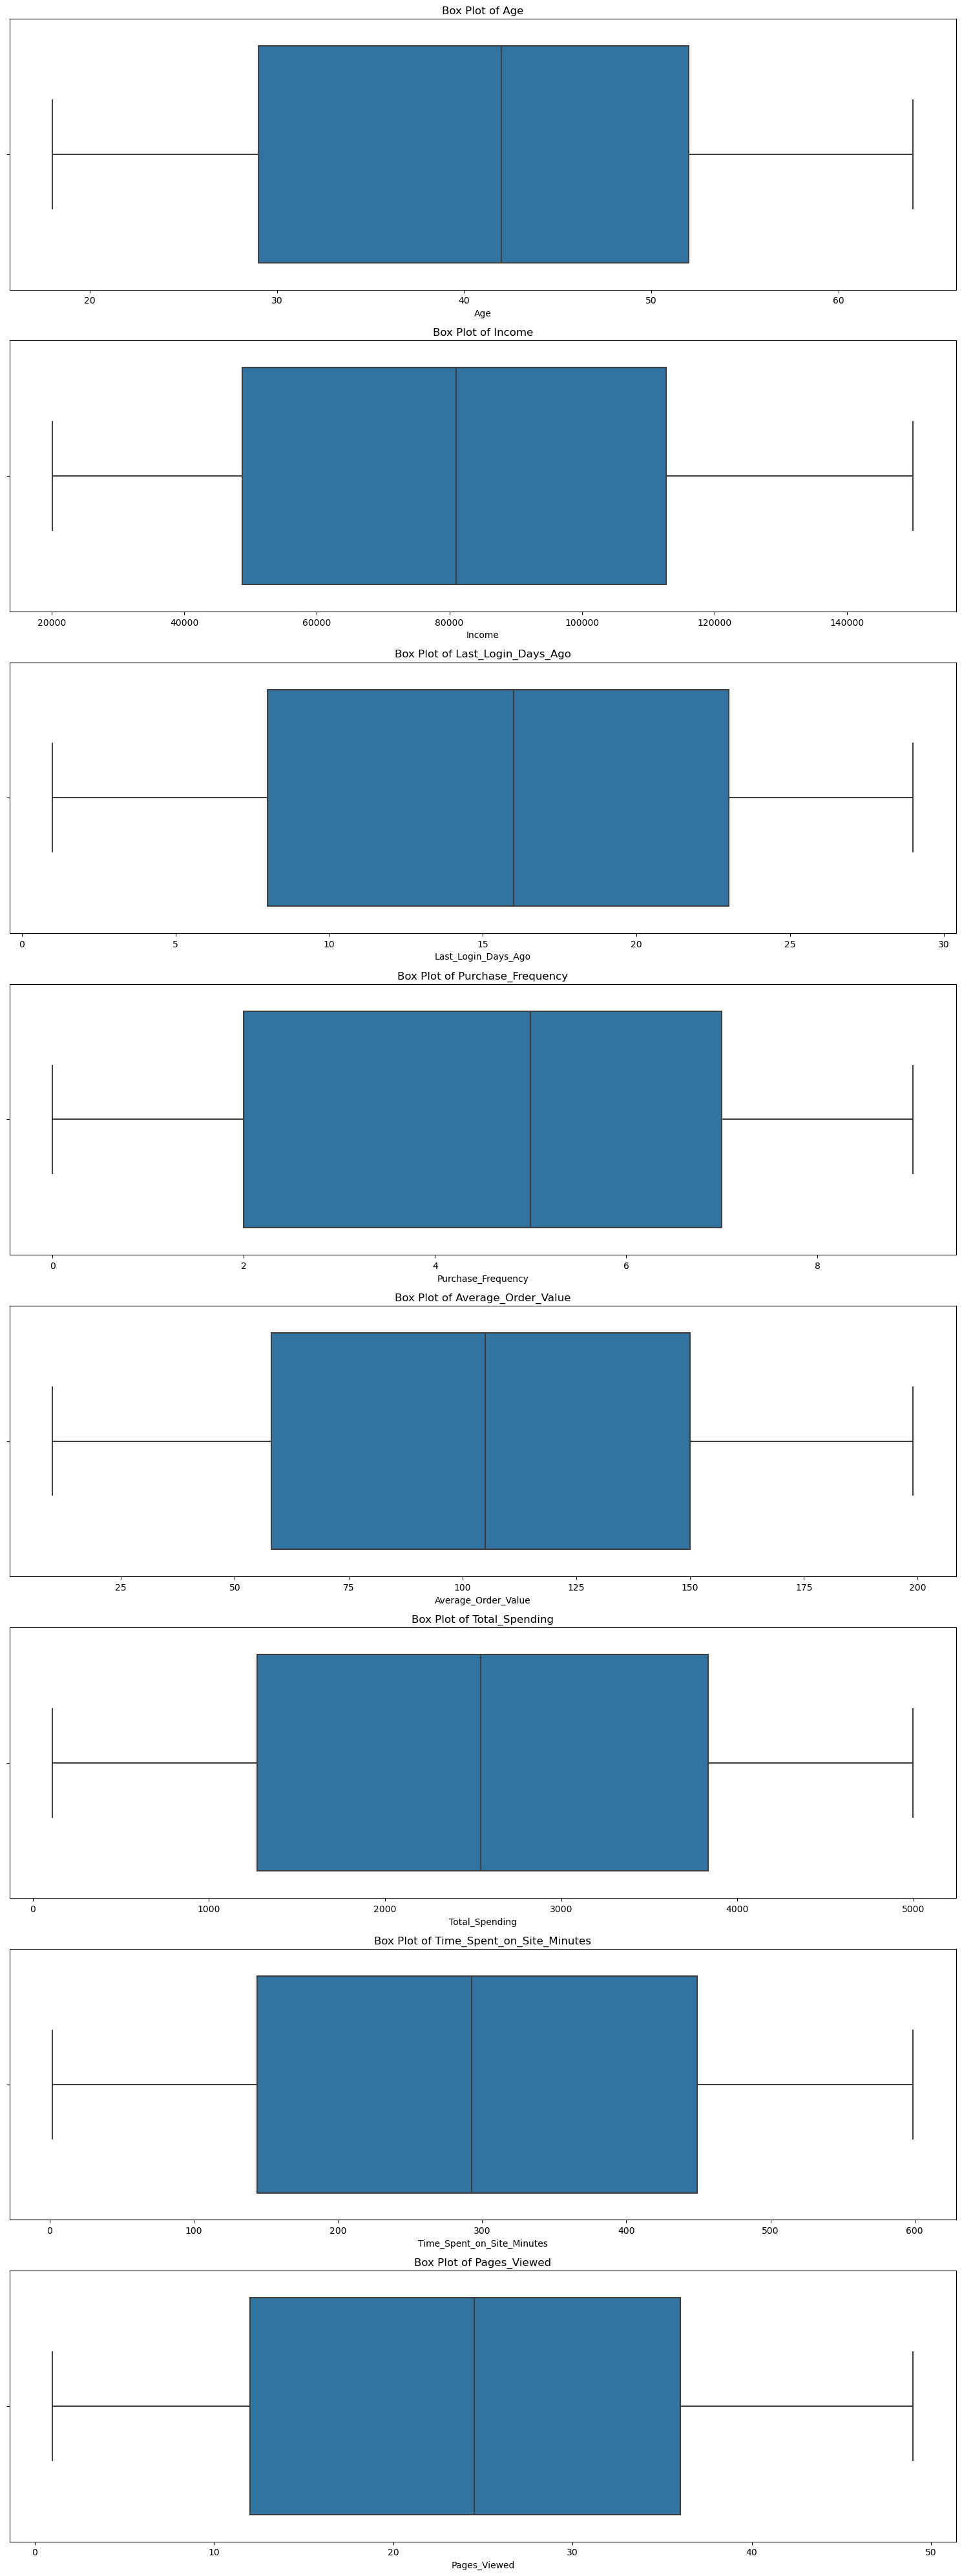

In [13]:
plt.figure(figsize=(15, len(numerical_columns_n) * 5))

for i, col in enumerate(numerical_columns_n):
    plt.subplot(len(numerical_columns_n), 1, i + 1) 
    sns.boxplot(x=product_data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()

plt.show()
    

In [14]:
product_data['Age'].value_counts()

Age
43    33
45    30
50    30
52    28
54    27
64    27
49    25
22    25
18    25
62    25
56    25
41    25
42    24
20    24
40    24
19    24
61    23
25    23
23    23
53    23
29    22
34    22
39    22
47    21
33    21
36    20
28    20
46    19
38    19
21    19
31    19
51    18
27    18
58    18
37    18
26    18
30    18
32    18
59    17
57    17
35    16
48    16
44    16
55    16
24    14
63    13
60    12
Name: count, dtype: int64

In [15]:
product_data[(product_data['Age']<40) & (product_data['Age']>30)].count()

Unnamed: 0                     175
User_ID                        175
Age                            175
Gender                         175
Location                       175
Income                         175
Interests                      175
Last_Login_Days_Ago            175
Purchase_Frequency             175
Average_Order_Value            175
Total_Spending                 175
Product_Category_Preference    175
Time_Spent_on_Site_Minutes     175
Pages_Viewed                   175
Newsletter_Subscription        175
dtype: int64

In [16]:
bins = [0, 15, 25,30,39,50,60,100]
labels = ['children', 'teens','youths','Adults','Middleage','seniors','old']
product_data['Age'] = pd.cut(product_data['Age'], bins=bins, labels=labels)

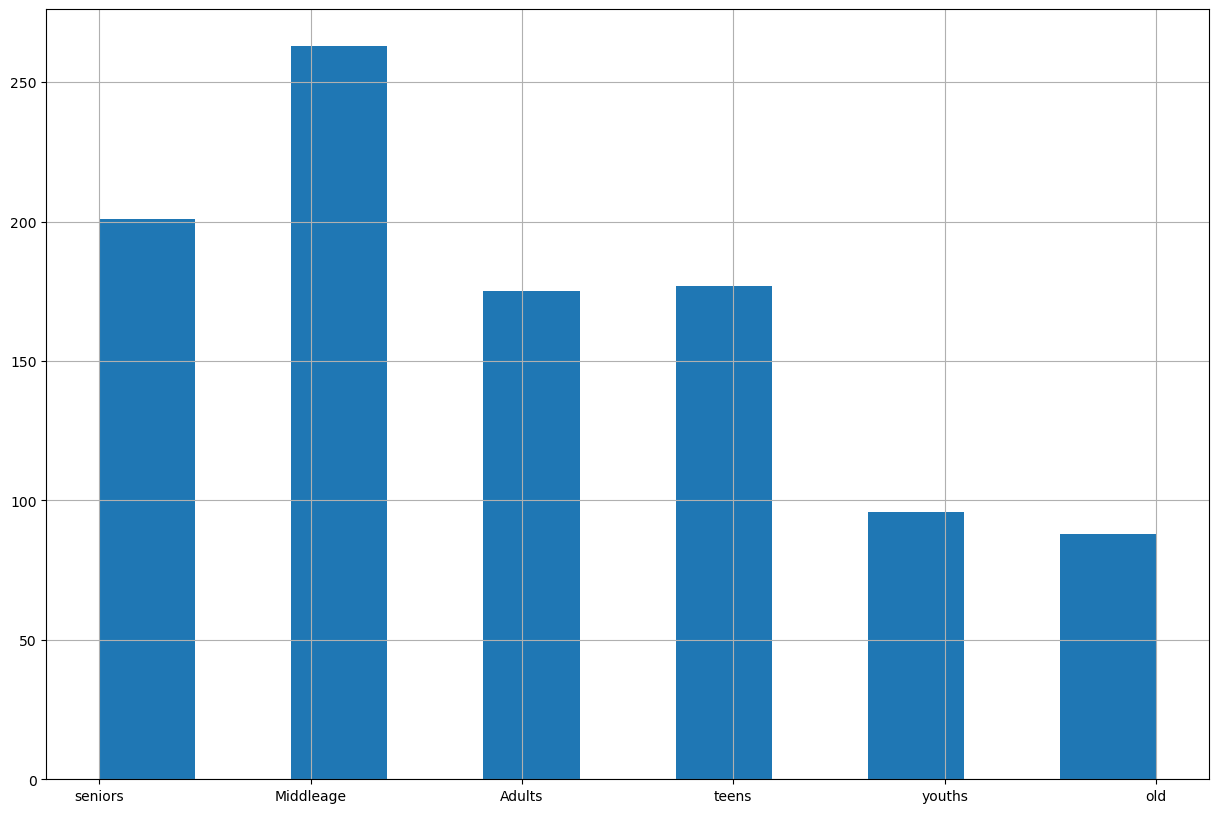

In [17]:
product_data['Age'].hist(bins=11, figsize=(15, 10))
plt.show()

In [18]:
product_data['Income'].value_counts()

Income
72142     2
69416     2
139664    2
35379     2
38037     1
         ..
70669     1
98021     1
129153    1
89184     1
74312     1
Name: count, Length: 996, dtype: int64

In [19]:
bins = [0,25000,50000,75000,125000,150000]
labels = ['lower', 'lower_middle','middle','standard','high']
product_data['Income'] = pd.cut(product_data['Income'], bins=bins, labels=labels)

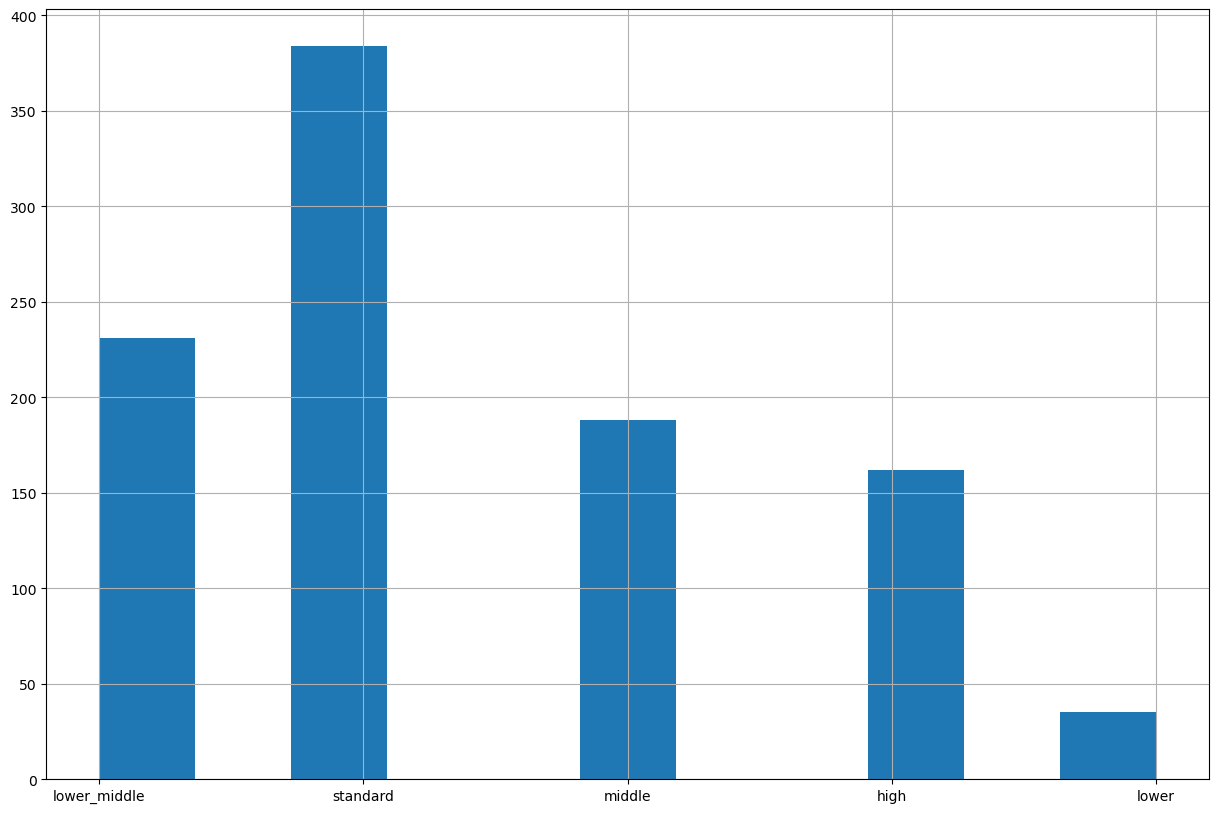

In [20]:
product_data['Income'].hist(bins=11, figsize=(15, 10))
plt.show()

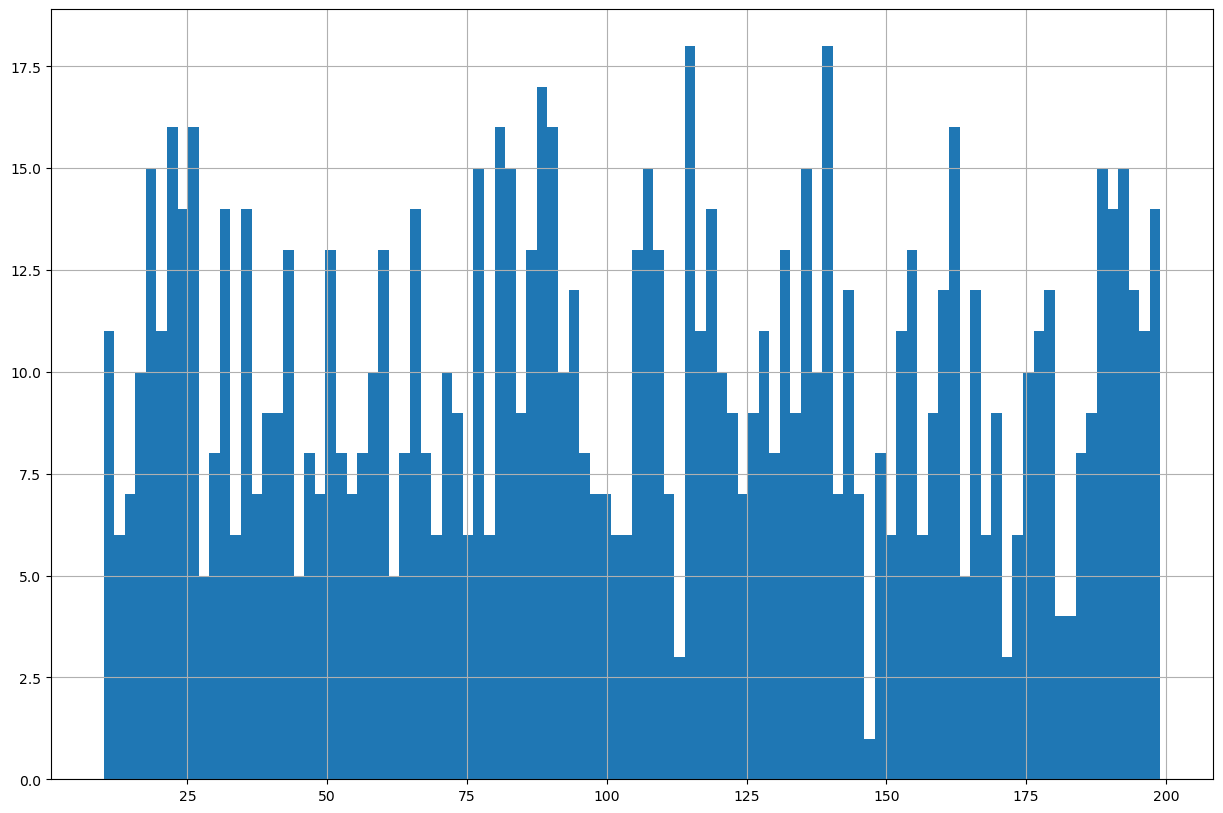

In [21]:
product_data['Average_Order_Value'].hist(bins=100, figsize=(15, 10))
plt.show()

In [22]:
bins = [0,30,75,105,125,145,175,200]
labels = ['very_less', 'less','medium','standard','high','very_high','excellent']
product_data['Average_Order_Value'] = pd.cut(product_data['Average_Order_Value'], bins=bins, labels=labels)

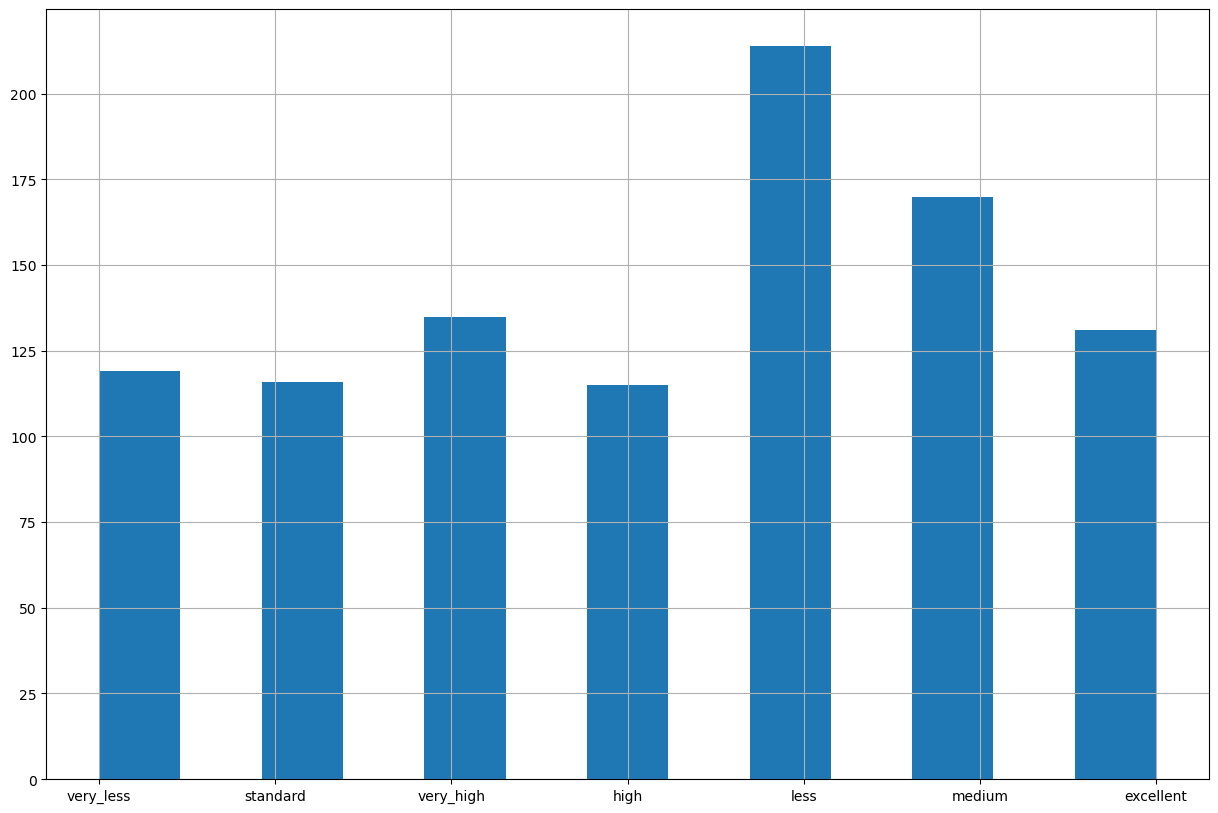

In [23]:
product_data['Average_Order_Value'].hist(bins=13, figsize=(15, 10))
plt.show()

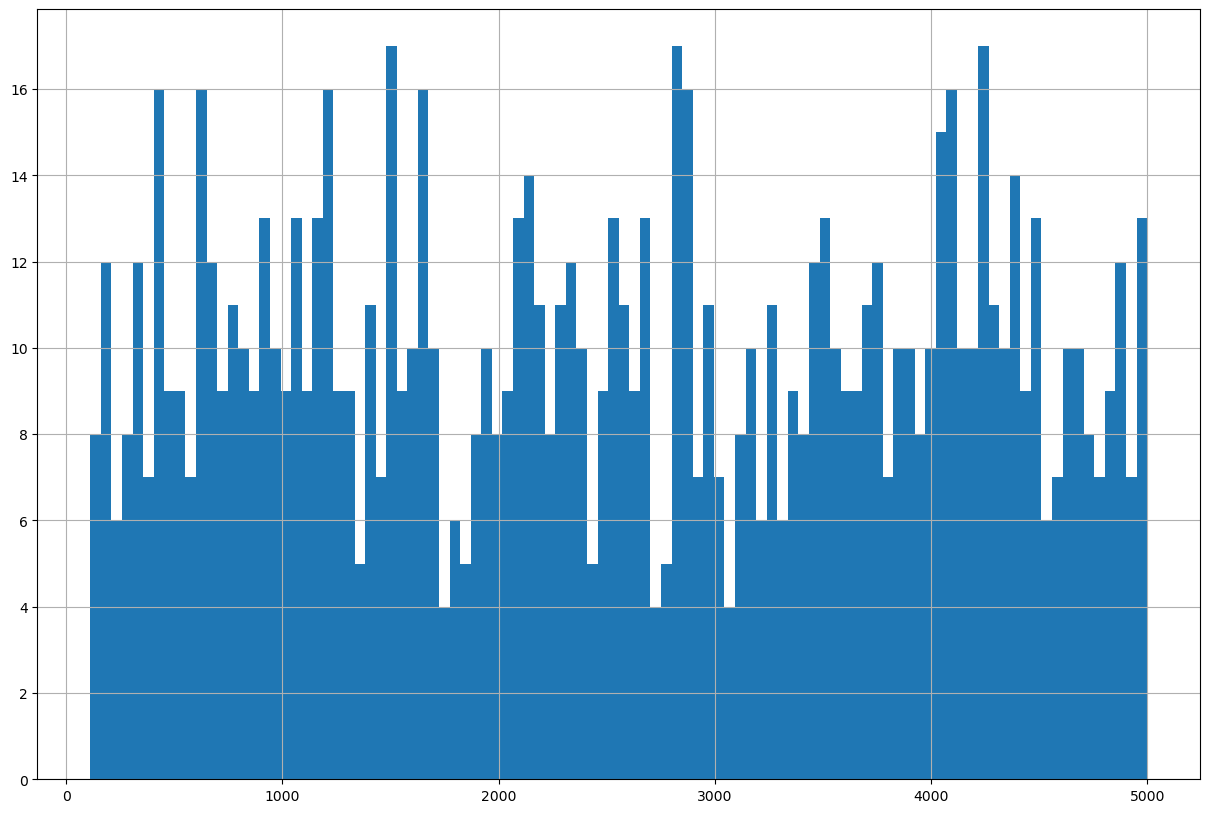

In [24]:
product_data['Total_Spending'].hist(bins=100, figsize=(15, 10))
plt.show()

In [25]:
bins = [0,600,1300,1700,3000,4000,5000]
labels = ['very_less', 'less','medium','standard','high','very_high']
product_data['Total_Spending'] = pd.cut(product_data['Total_Spending'], bins=bins, labels=labels)

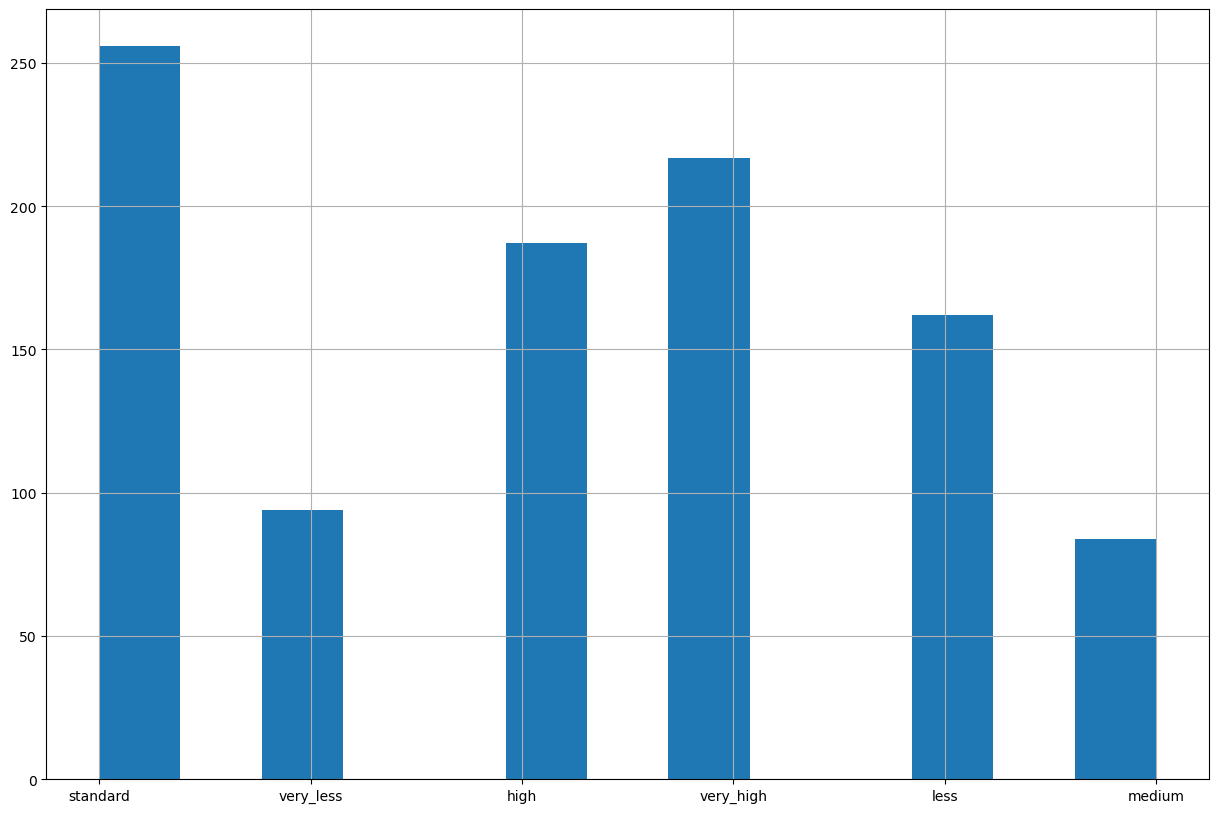

In [26]:
product_data['Total_Spending'].hist(bins=13, figsize=(15, 10))
plt.show()

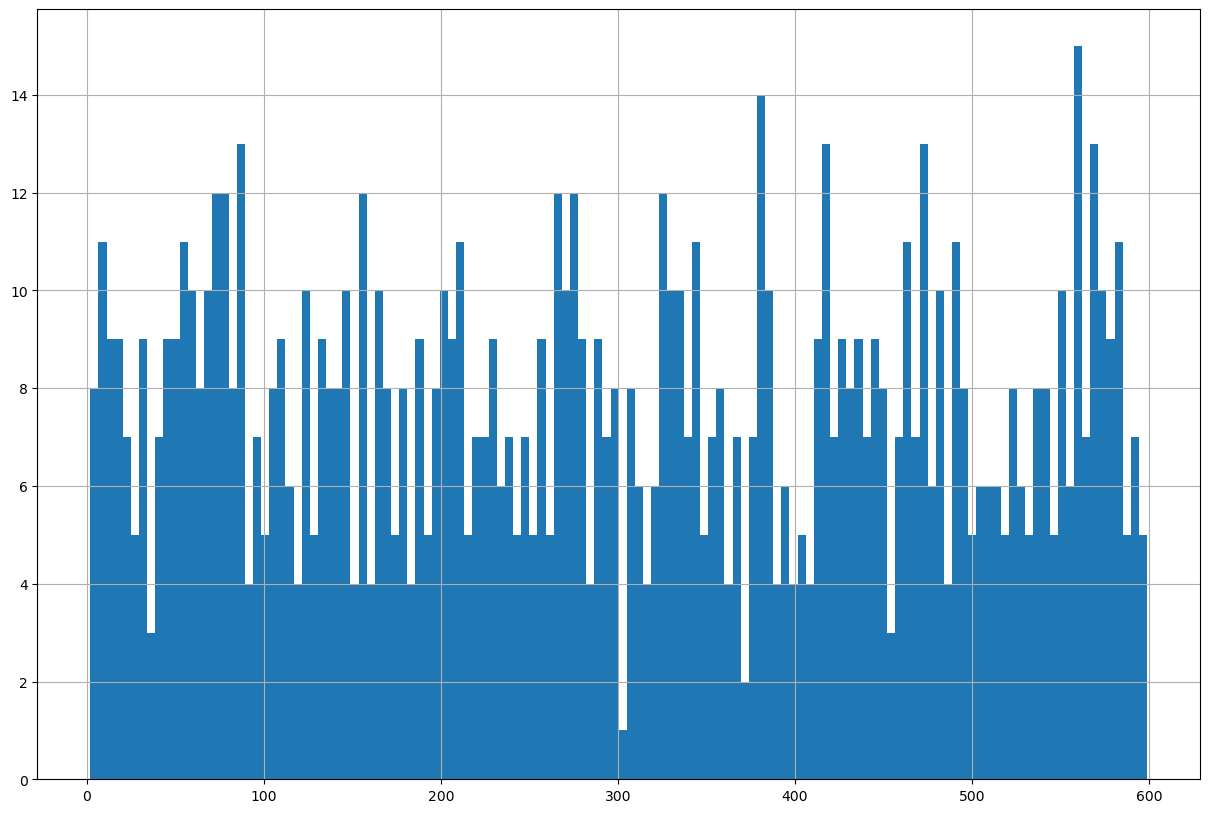

In [27]:
product_data['Time_Spent_on_Site_Minutes'].hist(bins=130, figsize=(15, 10))
plt.show()

In [28]:
bins = [0,90,200,300,400,500,600]
labels = ['very_less', 'less','medium','standard','high','very_high']
product_data['Time_Spent_on_Site_Minutes'] = pd.cut(product_data['Time_Spent_on_Site_Minutes'], bins=bins, labels=labels)

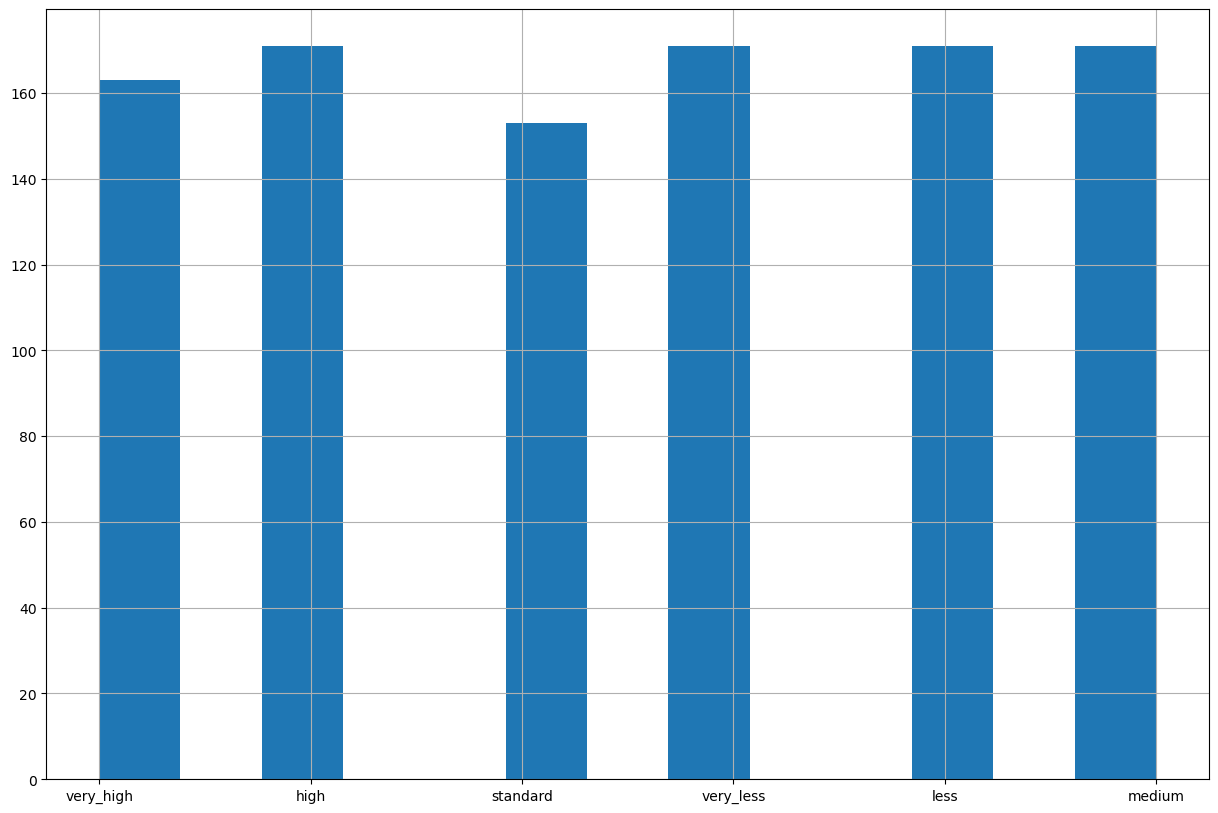

In [29]:
product_data['Time_Spent_on_Site_Minutes'].hist(bins=13, figsize=(15, 10))
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\Dines\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


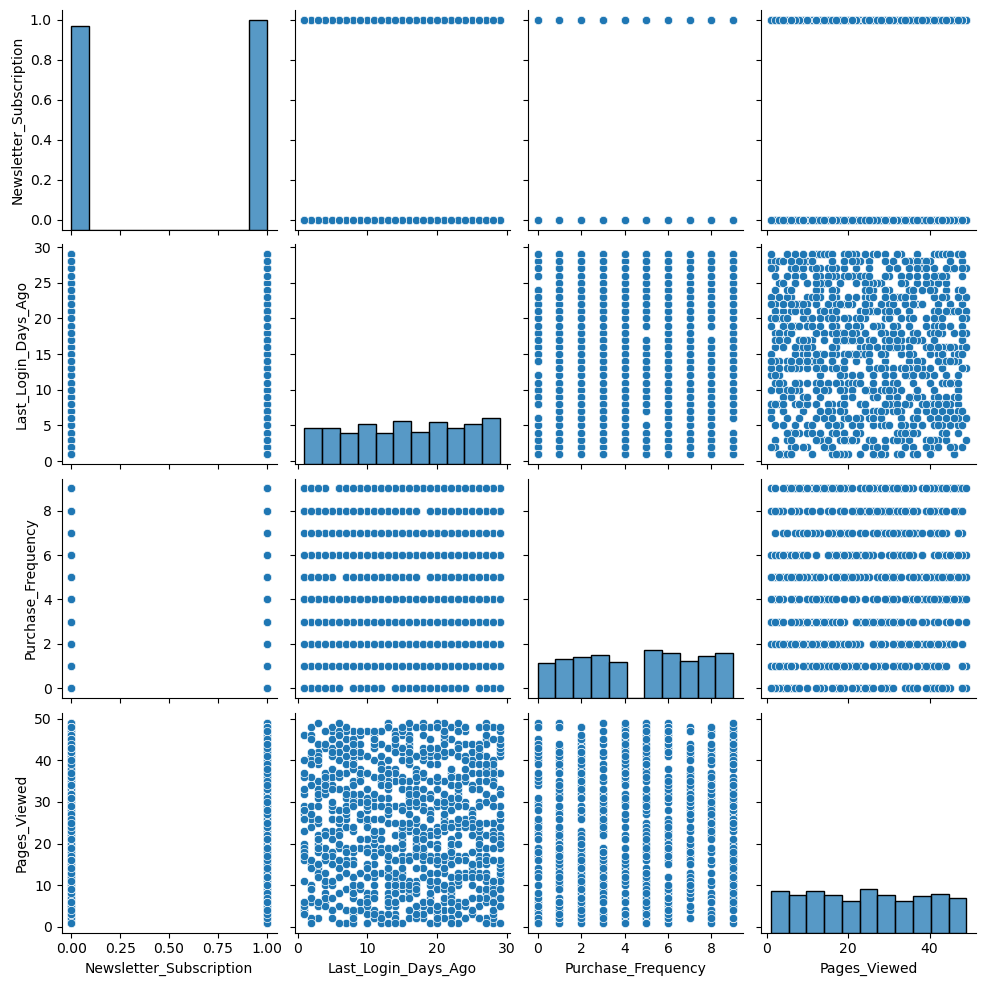

In [30]:
# Scatter plots for numerical pairs
sns.pairplot(product_data[numerical_columns])
plt.show()

In [31]:
#No specific trend is observed in scatter plot. Thus numerical variables are independent of each other.

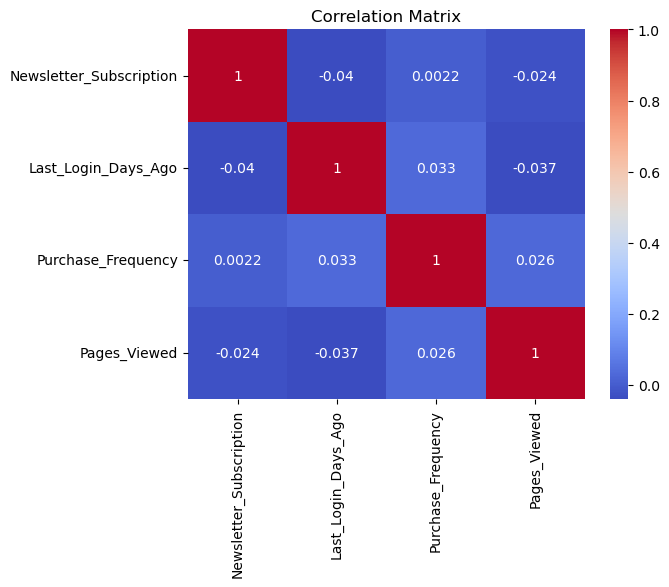

In [32]:
# Correlation matrix
numerical_columns = ['Newsletter_Subscription','Last_Login_Days_Ago', 'Purchase_Frequency', 'Pages_Viewed']
sns.heatmap(product_data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
# As we can see, no linear correlation between any numerical variables.

In [34]:
#There seem to be no particular trend between categorical variables and numerical variables

In [35]:
element_to_exclude = 'Newsletter_Subscription'
categorical_columns = [col for col in categorical_columns if col != element_to_exclude]
numerical_columns = [col for col in numerical_columns if col != element_to_exclude]


In [36]:
numerical_columns

['Last_Login_Days_Ago', 'Purchase_Frequency', 'Pages_Viewed']

In [37]:
categorical_columns

['Gender', 'Location', 'Interests', 'Product_Category_Preference']

In [38]:
categorical_columns  = ['Gender', 'Location', 'Interests', 'Product_Category_Preference','Age','Income','Average_Order_Value','Total_Spending',
 'Time_Spent_on_Site_Minutes']
for cat_col in categorical_columns:
    for cat_col_n in categorical_columns:
        if cat_col != cat_col_n:
            contingency_table = pd.crosstab(product_data[cat_col], product_data[cat_col_n])
            
            chi2, p, dof, expected = chi2_contingency(contingency_table)      # Chi-Square test
            
            print(f"\nContingency Table between {cat_col} and {cat_col_n}:\n")
            print(contingency_table)
            print("\nChi-Square Test Results:")
            print(f"Chi-Square Statistic: {chi2}")
            print(f"P-value: {p}")
            


Contingency Table between Gender and Location:

Location  Rural  Suburban  Urban
Gender                          
Female      153       149    172
Male        154       200    172

Chi-Square Test Results:
Chi-Square Statistic: 4.764863583156324
P-value: 0.09232578722773446

Contingency Table between Gender and Interests:

Interests  Fashion  Food  Sports  Technology  Travel
Gender                                              
Female         104    97     105          85      83
Male           105    99     108         101     113

Chi-Square Test Results:
Chi-Square Statistic: 3.3406603396611065
P-value: 0.5025158757824861

Contingency Table between Gender and Product_Category_Preference:

Product_Category_Preference  Apparel  Books  Electronics  Health & Beauty  \
Gender                                                                      
Female                           106     93           95               88   
Male                             112    105          114            


Contingency Table between Product_Category_Preference and Total_Spending:

Total_Spending               very_less  less  medium  standard  high  \
Product_Category_Preference                                            
Apparel                             17    32      22        57    42   
Books                               19    39      13        56    31   
Electronics                         21    41      16        55    41   
Health & Beauty                     19    26      16        47    33   
Home & Kitchen                      18    24      17        41    40   

Total_Spending               very_high  
Product_Category_Preference             
Apparel                             48  
Books                               40  
Electronics                         35  
Health & Beauty                     45  
Home & Kitchen                      49  

Chi-Square Test Results:
Chi-Square Statistic: 16.145549665551883
P-value: 0.7075545094596793

Contingency Table between Product_Ca


Contingency Table between Income and Age:

Age           teens  youths  Adults  Middleage  seniors  old
Income                                                      
lower             3       2       9          9        8    4
lower_middle     52      23      44         58       42   12
middle           34      18      23         45       49   19
standard         63      35      69        103       78   36
high             25      18      30         48       24   17

Chi-Square Test Results:
Chi-Square Statistic: 23.48473142949747
P-value: 0.26562439185122777

Contingency Table between Income and Average_Order_Value:

Average_Order_Value  very_less  less  medium  standard  high  very_high  \
Income                                                                    
lower                        4     8       7         5     4          3   
lower_middle                23    46      46        27    37         25   
middle                      27    37      22        26    18         29   


Contingency Table between Total_Spending and Interests:

Interests       Fashion  Food  Sports  Technology  Travel
Total_Spending                                           
very_less            16    19      20          20      19
less                 38    36      29          31      28
medium               19    14      16          19      16
standard             50    47      65          47      47
high                 43    40      41          27      36
very_high            43    40      42          42      50

Chi-Square Test Results:
Chi-Square Statistic: 12.098961671327846
P-value: 0.9126276646760346

Contingency Table between Total_Spending and Product_Category_Preference:

Product_Category_Preference  Apparel  Books  Electronics  Health & Beauty  \
Total_Spending                                                              
very_less                         17     19           21               19   
less                              32     39           41               26   

In [39]:
# We can see that there is no two categorical variables have P-value < 0.05.
#Hence we don't have enough evidence to reject null hypothesis. 
#Thus no association between any categorical variables.


In [40]:
encoder = OrdinalEncoder()
product_data_ordinal_encoded=product_data.copy()
product_data_ordinal_encoded[categorical_columns] = encoder.fit_transform(product_data_ordinal_encoded[categorical_columns])


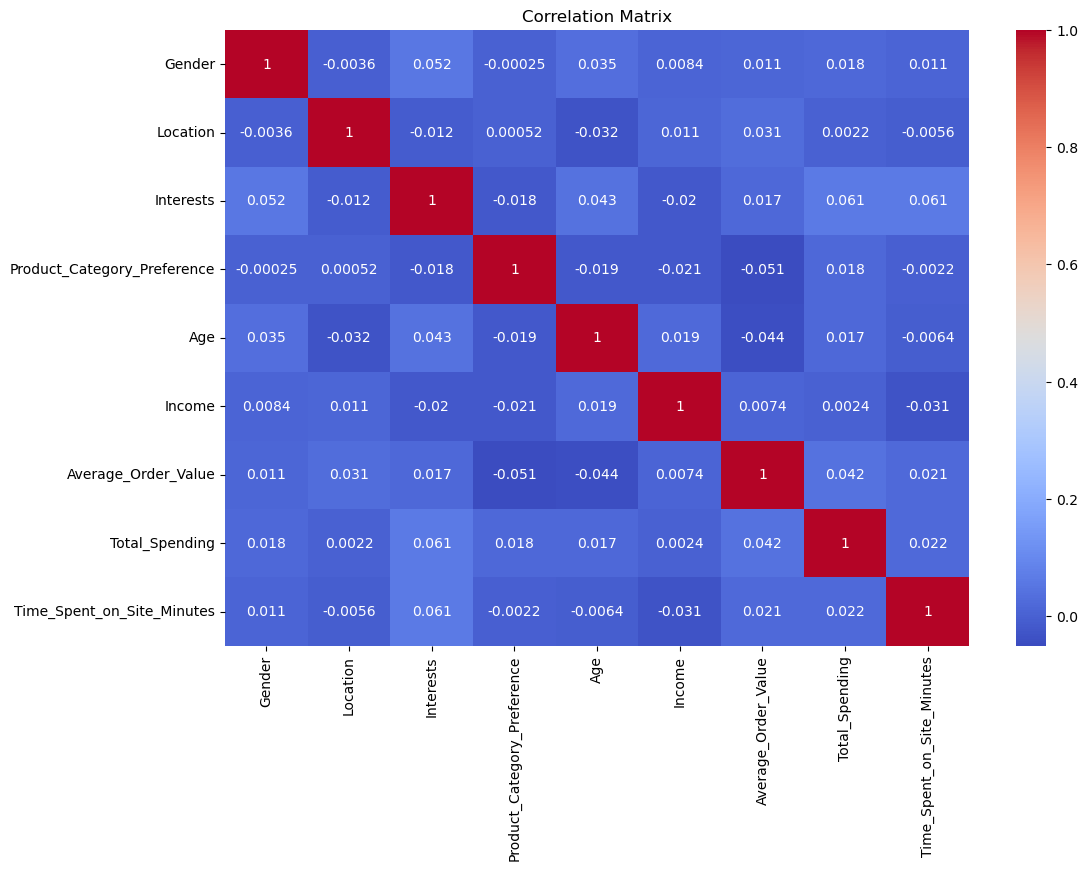

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(product_data_ordinal_encoded[categorical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Let's do behavioral analysis:

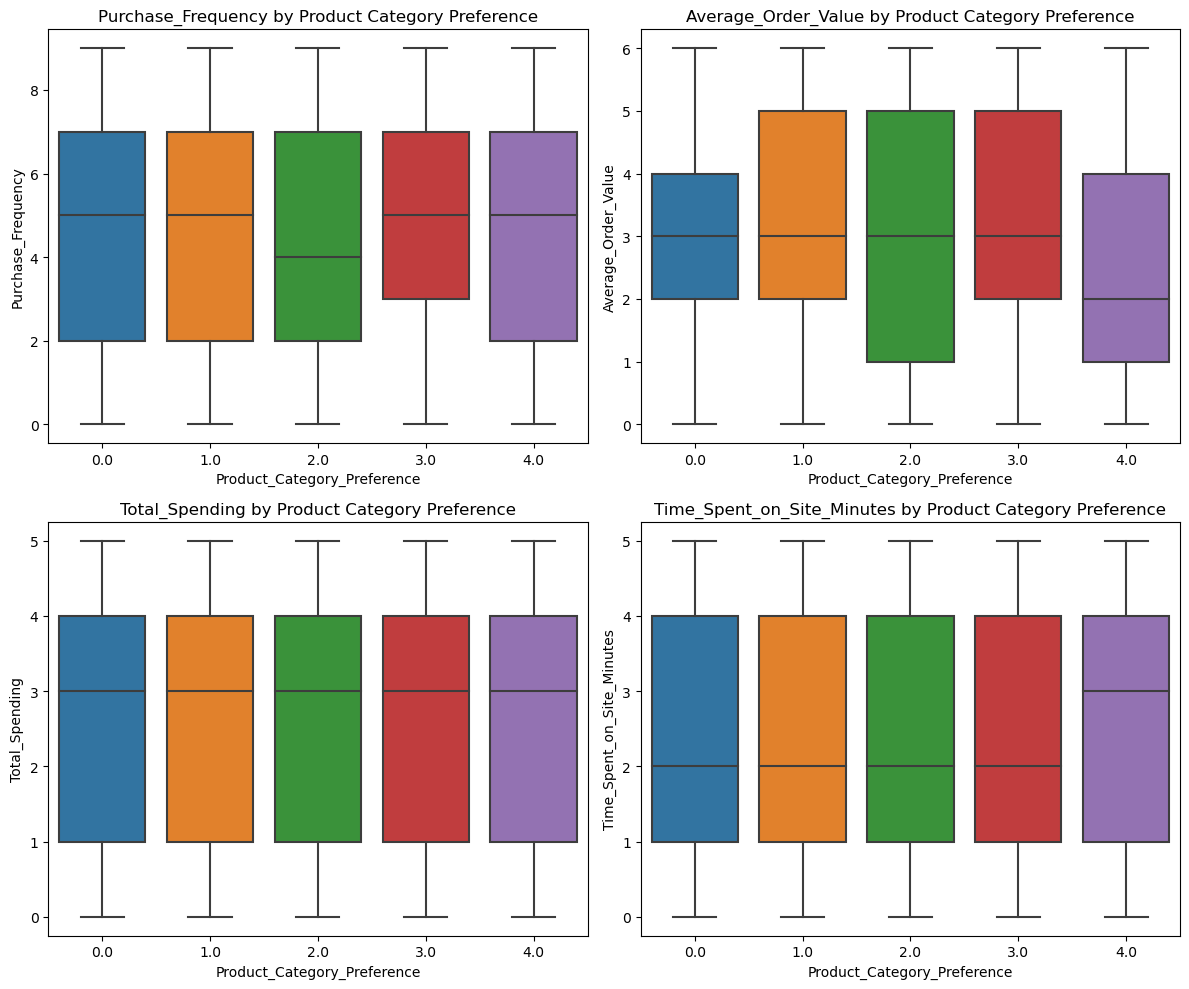

C:\Users\Dines\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

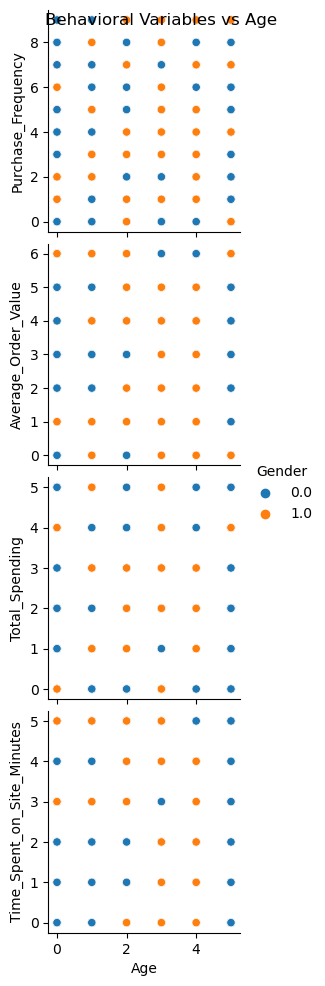

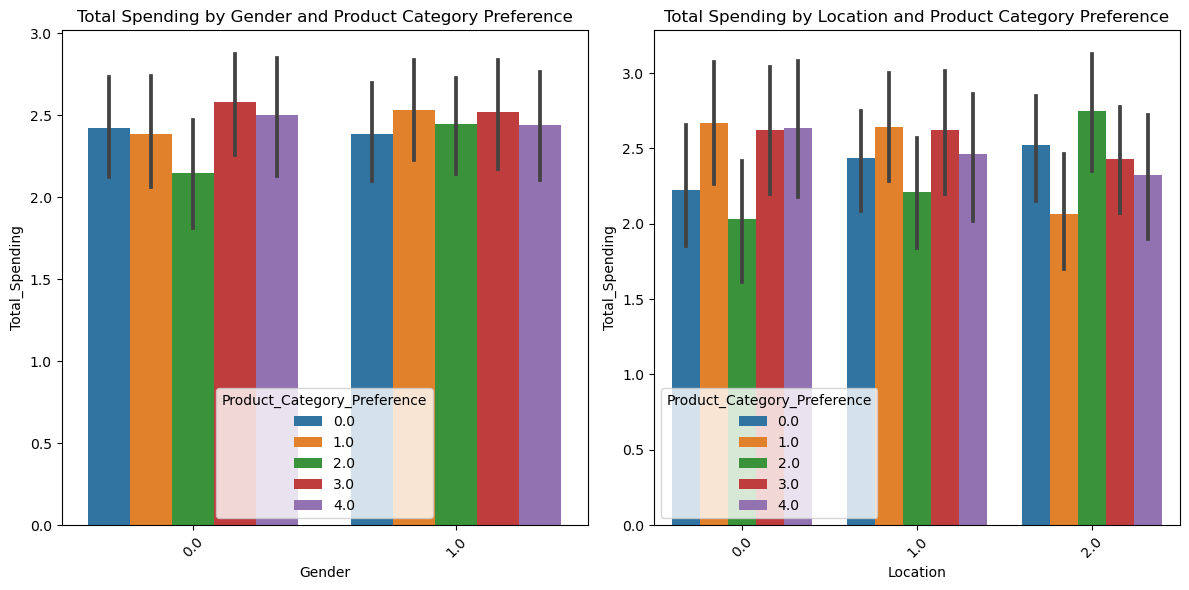

In [43]:
# Boxplots for behavioral variables by Product Category Preference
behavioral_cols = ['Purchase_Frequency', 'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Product_Category_Preference', 'Age', 'Gender', 'Location']

behavioral_data = product_data_ordinal_encoded[behavioral_cols]

plt.figure(figsize=(12, 10))
for i, col in enumerate(['Purchase_Frequency', 'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Product_Category_Preference', y=col, data=behavioral_data)
    plt.title(f'{col} by Product Category Preference')
plt.tight_layout()
plt.show()

# Scatter plots for behavior vs Age
plt.figure(figsize=(10, 8))
sns.pairplot(behavioral_data, x_vars=['Age'], y_vars=['Purchase_Frequency', 'Average_Order_Value', 'Total_Spending', 'Time_Spent_on_Site_Minutes'], hue='Gender', kind='scatter')
plt.suptitle('Behavioral Variables vs Age')
plt.show()

# Bar plots for categorical attributes vs behavioral variables
plt.figure(figsize=(12, 6))
for i, cat_col in enumerate(['Gender', 'Location'], 1):
    plt.subplot(1, 2, i)
    sns.barplot(x=cat_col, y='Total_Spending', data=behavioral_data, hue='Product_Category_Preference')
    plt.title(f'Total Spending by {cat_col} and Product Category Preference')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
#No Specific trend observed.

In [45]:
scaler = StandardScaler()
product_data_scaled = product_data.copy()
product_data_scaled[numerical_columns] = scaler.fit_transform(product_data_scaled[numerical_columns])

In [46]:
product_data_scaled.head()

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,seniors,Male,Suburban,lower_middle,Sports,-1.290739,0.835231,very_less,standard,Books,very_high,0.970302,True
1,1,#2,Middleage,Female,Rural,standard,Technology,-0.071450,0.835231,standard,very_less,Electronics,high,1.113025,False
2,2,#3,Adults,Female,Suburban,standard,Sports,1.513626,-1.280170,very_high,high,Apparel,standard,-1.670073,True
3,3,#4,seniors,Female,Suburban,middle,Fashion,0.294336,-0.575036,very_high,very_high,Apparel,very_high,0.328049,False
4,4,#5,teens,Male,Suburban,lower_middle,Travel,-1.656526,0.130097,high,very_high,Health & Beauty,very_less,-1.027820,True


In [47]:
X= product_data_scaled.drop(axis=1, columns = ['Unnamed: 0','User_ID','Newsletter_Subscription'])
y= product_data_scaled['Newsletter_Subscription']

In [48]:
product_data_encoded_features= pd.get_dummies(data = X,
                         prefix = categorical_columns,
                         columns = categorical_columns)

In [49]:
product_data_encoded_features

,Last_Login_Days_Ago,Purchase_Frequency,Pages_Viewed,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Interests_Fashion,Interests_Food,...,Total_Spending_medium,Total_Spending_standard,Total_Spending_high,Total_Spending_very_high,Time_Spent_on_Site_Minutes_very_less,Time_Spent_on_Site_Minutes_less,Time_Spent_on_Site_Minutes_medium,Time_Spent_on_Site_Minutes_standard,Time_Spent_on_Site_Minutes_high,Time_Spent_on_Site_Minutes_very_high
0,-1.290739,0.835231,0.970302,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,-0.071450,0.835231,1.113025,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1.513626,-1.280170,-1.670073,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,0.294336,-0.575036,0.328049,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
4,-1.656526,0.130097,-1.027820,False,True,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.294336,0.835231,-0.242843,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
996,0.050479,-0.575036,-1.455989,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
997,-0.924953,1.187797,0.684856,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
998,-1.778455,-0.575036,0.256687,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [50]:
model = LogisticRegression(max_iter=1000, penalty='l2', C=0.0001)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)
f1_scores = cross_val_score(model, product_data_encoded_features, y, cv=kf, scoring=f1_scorer)
print("F1 scores for each fold: ", f1_scores)
print("Average F1 score: ", np.mean(f1_scores))


F1 scores for each fold:  [0.65319865 0.67549669 0.         0.62068966 0.50980392]
Average F1 score:  0.4918377837362833


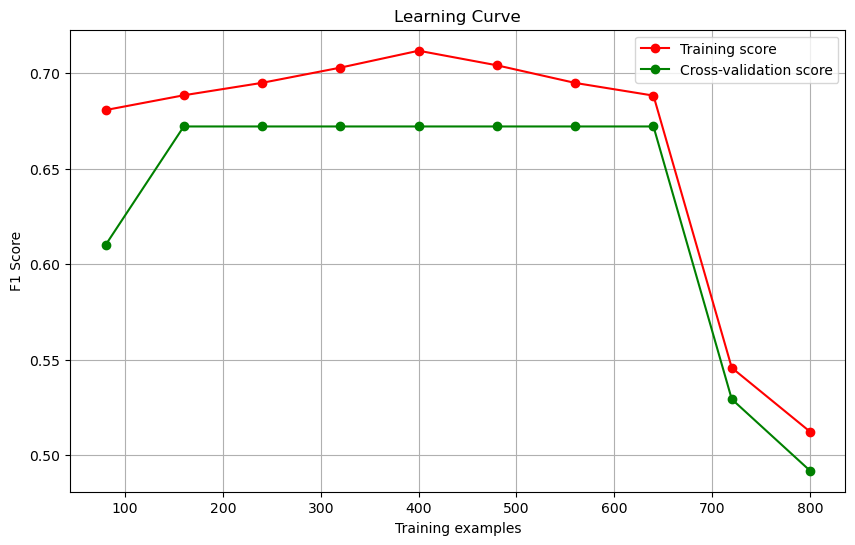

In [51]:
def plot_learning_curve(model, X, y, cv, scoring, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curve
plot_learning_curve(model, product_data_encoded_features, y, cv=kf, scoring=f1_scorer)

In [52]:
def cross_validate_model(model, X, y, cv):
    scores_train = []
    scores_val = []
    for train_index, val_index in cv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Fit model on training data
        model.fit(X_train, y_train)
        
        # Predict on training and validation data
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Calculate scores
        score_train = f1_score(y_train, y_train_pred)
        score_val = f1_score(y_val, y_val_pred)
        
        scores_train.append(score_train)
        scores_val.append(score_val)
    
    return np.mean(scores_train), np.mean(scores_val)


train_score, val_score = cross_validate_model(model, product_data_encoded_features, y, kf)

print(f"Average Training F1 Score: {train_score}")
print(f"Average Validation F1 Score: {val_score}")

Average Training F1 Score: 0.5122716350418254
Average Validation F1 Score: 0.4918377837362833


In [53]:
#Applied ridge regularization. C value is set very low in order to reduce variance. Accuracy increased a bit but not too much.
#According to learning curve it's clear that there is no issue of high bias here.
#Feature engineering won't help much in this case.
# Hence We interpret that Logistic Regression Is not performing well on this dataset.

In [54]:
#Let's try neural networks.

In [55]:
def create_model():
    tf.random.set_seed(1234)
    model = Sequential(
        [     
            tf.keras.Input(shape=(49,)),      
            Dense(2000, activation='relu', name = "L1"), 
            Dense(1000, activation='relu',  name = "L2"),   
            Dense(500, activation='relu', name = "L3"), 
            Dense(400, activation='relu', name = "L5"),
            Dense(100, activation='relu', name = "L6"),
            Dense(50, activation='relu', name = "L7"),
            Dense(1, activation='sigmoid', name = "L8")
        ], name = "my_model" 
    )
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
     loss=tf.keras.losses.BinaryCrossentropy(),
    )
    return model

In [56]:
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(product_data_encoded_features, y, test_size=0.2, random_state=123)
model = create_model()
history = model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=64, validation_data=(X_val_nn, y_val_nn))
y_pred_val_nn = model.predict(X_val_nn)
y_pred_val_binary_nn = (y_pred_val_nn > 0.5).astype(np.int32)
f1score_val = f1_score(y_val_nn, y_pred_val_binary_nn)
print(f'F1 Score on Validation Set: {f1score_val:.4f}')

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.6971 - val_loss: 0.7014
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.6971 - val_loss: 0.7029
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.6970 - val_loss: 0.6970
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.6891 - val_loss: 0.7124
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.6541 - val_loss: 0.7724
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.5725 - val_loss: 1.1091
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.4152 - val_loss: 1.2856
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.3015 - val_loss: 1.4494
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.4072 - val_loss: 1.1720
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.2418 - val_loss: 2.1342
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
F1 Score on Validation Set: 0.5635


In [57]:
#Let's Apply xgboost.

In [58]:
X_train_xg, X_val_xg, y_train_xg, y_val_xg = train_test_split(product_data_encoded_features, y, test_size=0.2, random_state=123)
model_xg = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model_xg.fit(X_train_xg, y_train_xg)
y_pred_xg = model_xg.predict(X_val_xg)
f1scorexg = f1_score(y_val_xg, y_pred_xg)
print(f'F1 Score on Validation Set: {f1scorexg:.4f}')

F1 Score on Validation Set: 0.5118


In [59]:
X_train_rf, X_val_rf, y_train_rf, y_val_rf =train_test_split(product_data_encoded_features, y, test_size=0.2, random_state=123)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = model_rf.predict(X_val_rf)
accuracy_rf = accuracy_score(y_val_rf, y_pred_rf)
f1score_rf = f1_score(y_val_rf, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.4f}')
print(f'F1 Score: {f1score_rf:.4f}')

Accuracy: 0.4500
F1 Score: 0.4554


In [60]:
#neural networks seem to perform better than other models, but we've to improve significantly more.

In [61]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [62]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(product_data_encoded_features)
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=42)
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [63]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.57      0.40      0.47       103
        True       0.52      0.68      0.59        97

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200

